# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


(np.float64(-0.5), np.float64(535.5), np.float64(353.5), np.float64(-0.5))

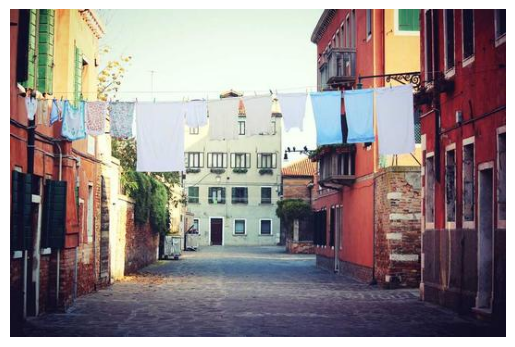

In [11]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
import requests
import base64
from PIL import Image
base64_image="""/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAABgCAAADoAQAAQAAAGIBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDMwOP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAWICGAMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAEAAECAwUGB//EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAABxMjUyluX1XL9bnz8n1PO9RORT2z4PVKy9eGvPm64091dN1vzJ3dpk7oZ042TpiToGTpDKSBk6Bk6Bk6Bk6Bk6BmkgipZjOX5kpq2sLrlPVGy2Kdepn6WbH6rl+p51m890fP9fjQB0M6tq88kXTo0MzUyhkV30qop2aa6koAU6rLXyt7n8t9fosDoc+bH3cToIy00pcXpEO89cBXJFurb67ejFJ1cJO6GTuEXdAydDSdMZOgZSQRd0DJ0JmkgipIIp0DcJ1vndUMVEldkblaZxd3nohohn5A/S8x0/OCYPZv0edxWX6Rxtac0MUN0VpY+1jKiqr6ioxmwomCkDBRqrDS57oeez33+hwNvLlyel57qYyKaxuP0ZEB2b4Exk9DSrlvnN0qlOnGydMSdAzugZOgSSBJ0DJ0DJ0DJ0DJ0DJ2AHgvS+cenJXSqNzoUReZDQIz6Ufn6OGw/T8x1GWLJ1nlDlOs5TW+cEME9Dn08jZxVZtJFZVbNMKjRUnprIVRt870XOydQULpZcgHUcztxO1GTcnfGq/O6ObbhlFPXRkw22RNcb0QsUrlnSYknBnSBJIEnQMnQJJAkkCZ0DJ0DJ0Dc50fOlctGGno8m2JTVZWfoY90tADR59xOp5bqcsEyWeTcr1XMaXzAZwfo4amLu46s9x+hm8rPJHKhCyARVavHd53oMOV02wAZhyZ/Scz1UoxTbm7oU3w2wsKqsWg9gpmsKYplzNJ9JaM2B06BnSBJIEkgSSBJIEkgSSBJIEkgXO9Fht8fpx5+0Ysu00J08m/Lp1T8PRx2p3OdPWJtQFqhs63O0cATM7oy1N7jypqY8lPXVJpNVwmiYJ1We30GIPktIgLVjDN6XL1Ig2UHw6YwmHtz6jxjOtVgmhvmPoUW6TJRdp0yCSZA6ZA6ZMdRcHjnYs11q5XeaMemoCo0UiOQyoJQzATinB1PN4Hey0jzld2QtOPN6lyck+y/LfPOkhIe9rnI43rOIjXpubriyMTBxmThPPsqmyCDOzmKknnvXUk467cnfo8+swKWGliUenlLEm+UX21xXXXbKhll1DXleSKSO2DILFBBKKcK42syEozhweSRCi8CdNBJ9M1VZbDredekuyVK0LRzHnJktM8kqic7nJKsY2Vyz1m0olNGTByfI9jzS2CsLqmr67JZ9iVtCqqVdrit2g4dQV575nOHZV1gnM6NY9IKgUHGcj1++BaaRnGVM8emykhkqnaWuRFjOh0k26ZAkpDZmiJSsqhukydeTsZwtJ4u2sfYFRnbk67l513NEZOvmEVqL75Y49+StOuTO82TLHe+Mots0ohzvOdZyq1YM8HLsKeUJ2OyZV6csHiSqGstrVJWpwaqSMtcbSAM25Oir5+/LZu54Anfm7a3NJfNfO18ehqNrLQBdkXXO9ZmaLUklQ6ZArqb5YtxVeNMLZS1NVyofM0piqruQDVloJkjHsau1MWbpZN51OM3VyCc50eCtevnnqsy551nP1aqZK1F4hmct1gUVzoG1iZ997WWNDzjuq+fj03NuJzrvGcueV8e3JNzelma+JubcRAB1UXhmQJ0z6LRwCOfTpnzyax2Mk8EzwrAK4ZXScT2XRJSS0lOyB7qIIKrwiMa05gUBqwySWHLGpFvQoGT0G5oxratFzqN2Ec+ls4OHzgagudC3oj1VjP3eX6rDrA6TN0Mr1XhPr89ovOarlWLhrzfP9Zzeuy6fnc4nXuERVD1WtwvotVDp1rx60Wv5u3D28Lo6zaF8ctsomqO2G5pZ1uTdGXZWaeKbpyYvKd7yQs7seO7PeCmi+qkosE4QokHL54qHpzbARszw9wGzRhHPSjEgyxScI+10lwT5662eFTjqLznWA6HIGWWdOIdRtDKem5rpOfvtMA08L0Z4FN+f0hXEFZ6dLkhXWcuBtY/ZmaNMZaGvE9VnPIwKVKsVCdXkOKQIQXZTQHQWAZuW27ZjlFb5mefhuTKmWaN2+P67XkjxvYcrmseGlh6Zbg1cG9TP13ms8+eloStesVgRcQBKlBldZcRXA2xHlklVUs/J0LlrkvqQjTNMphYPWHdrjdEGpPR2MHoseu2iVMjSvZZwJYVzfK0XSAsLosfR1jk1Mv0wZzdU6r6zxdIO8RCZVIQpYgr6iPRFPEZmjnKrSwzQ2ngXy9thUqkge3867+sLeH73PmeBB0srbIxx9AWs0S+d9MEsG9ANXL19sTuP67FGD02JtM4au99V2yZYVwXW8z1GiySXzI10xw1Ogm0AXaFqIi7ySmIVrTGLw6pxlEycmjTfMOJo0szTIswPNNF0oQc8CouIDLCsgUioAIGKBKKchj2Vk3EiHolnaOaKw/POnTYTR5u7pB76DDK7HhewrLYoJzIXF4mtlbq0kG95bvQcpq4GwF1GGtaLqTdc0GVMWPozqozqtuIqqiGawTTqWcZMSCslhEw7U52b12oZVis+VJE7XkUWY9VrNSZE02HVziS0M0m2i6psYA3N0qyu+DQJwOg8giByms+6FjKVahZ0ZRcPr5WwmGGQMS5wRy11bhSubu6AW4U5cfrOP628+hydbE564rJ1s/qarKz7y1dPnt/Oe5wNbMy1Ihka+2R/F9n5rS6Tb5PsUZsLKbz1a50Q+f2uO6nUxcPoMJVcLvYhVVdlbV5A9s6aVtNufTfZVPHrspsGeRpmdY8DY51dZkn8/qDWXu5Duu2vfHyOnn6WmIsSxHIVlVjD0ymsCKV4y3+f6WTAqeNEihNGdLdKi/Dq3wyhpyE6nge0vLew9vI564/OPC6bhC46pyOhxOjeFkNbJkjoxIan596Dw7ZfYct0RIlOhFK2iVYsjQnXZn4Z8XZXP8AR5M2BTqAXMpslepOL59N1tFuPXMIoOsi+g5Q459bnSM6otvAKboZlc3PGKoaMqKzt1cnVazqyxGqElLnfK2swegydWXRAIUaORE629Bk62dGY+hlZsHruL6zXPqcDe53A5kWdHSOWIc1mdPyxby6UDM6ZPF0jkil7HFVQSzQsTHazo6UGZzHxayAOnYrnn3aZ0wFt5LEg5GhbVvG19o9uXVMA7PeaNz+irnwKeuprHlyNoNvLTNRfF4y6KbK6ierk6zBwiwmqkyksacRkHAbpGMIWDO2naK4atQsZrSQBsaB9dze/WHWcj0/F4mILbLpIG1ScGMPNwRKD1Nqqk1ZZQzV0YwaselNWvTEL1RFhKFYZaBiBIE6lVSeM2QPbVNWWjzz6CKWU3XK8EmKjbWdOoDIKpQeoua6ibprlCono5hbVNNkGVpILWqmi7cwTSQ6J1zoYyiBDwSu68WqbM1sU4y6izJXPZwTvThXOdJrpO5aFicxaxNM02ahUZTSHgSmholJgTGRaCgfAYLGVsCp0WDJbTpYCiYjHVsVVYhUEFUj1y3Ur2hr4aqeRF5UFhliw6IyhUOUIUyqEoNQSQNOEwsNBJSEiolEKohO5TICu6MhFSEtQYhpIKhS7L5iuBzgyAuQbgY4cAOYZgMcccR0Q0wthIsPiGgNYNgMgI4FMJEZcBogWwlQGIRBchoMJahgtjGoCYiVopaysJRUU2lWmrNDN0wDrlWFaSaU4OEyakKqFzjqIebV8YuJSiyd0qZDtlS4yZQqEVYFai16JMm6qAqNaCbwkFrQYHeuYShOtjxignBpAzJBGFlYKudY08IBdW0gjFMDQkwRTIEzMKTMyFF0FTXVBaSDNMgR4iZJMdJBOypCuVSZe9Lhc9SAmQ0guVch3TokKydEglbUguepBa0YBcqnC1DoCZi2BOD1sdkgaY7ha0EE1WwTaKG7RYJtCISepguhBglF4IkzME60wMzxBKKCTRSHeCCTMgSSBJILEkCZJisSCNiQmsSHF0gchJy8Eh2pILK0gtGSBEJCrgkORSQJ0hCTSGoJMatITWJJxSTGSSGgkNopCaaQ65JCg6QNBJDJIbMkhnSBkkCSQJJB/8QALhAAAQMDAgUEAgIDAQEAAAAAAQACAwQREhMhBRAxMjMUICI0I0EkQjBAQxVF/9oACAEBAAEFAgpfJSbzzl12NKhdaJyb2/1mZKJdBsDWnNg/3uIT603c6NtkGkrE6yd0qFw77Le7iPXlIfzVcz5KuTaaLxN7z3TeZvbyb4z1D2KTyUX2KvuaW4s+s4Xch0c3JsebXj8UlrIf7ldNo08xTGpouX5BWQCd0qFw77De7iPVDpMPzVW1Y/zQ9g7j3zeZnbyYPwnroMT+/h32KlrWuaCmsGke88v3JHkmOErIzk3/AHOIVOpNa6svyRtAuw9E7pP04f8AZBGpXsL1pOQY5VAs+r+1L54e3+zu+fzR9nKPwnuKPXhgJmqSSmsYVG06R8nsd8ELO/3KyTSp5Rd7QgzJfIzDt/SMGTJu2hH8gMAdqLUWouLG9VWfZl88G6/u/wAlR54+zlHuxsN3HtXCtpqvuYHXB/ER80/nb/dqqf1EU1LJTvsnMGJH5f6/pzbq5Mc/Th/2vZxUflrvszeenR75PJUj88XaiqdmSfUNYHdi4Y0udMS5M6tFoT1VRtDE4liKNw1vT/b4qNr4DLcy4HVFsxZfqftoPtezivkr/sz/AGKdHvePyVfmj6L9XI5SeJcL6DMgNamgWX7qPCCyOFZDW255tCZkf9nirNRjoQBAy7GkvmicHG9wOn6mHxoPt+zinkr/ADz+alF3O75d5Zadz3vpNKDkeUvhXC2hzXswiZllK92X6HWo8VTGX0HD45YY5BIKxZ/lAIPX/a4r2mZz3MFoYjaopXNDW9R0U3ZQfc9nFB8q/wA1R56Tvc0mRwvIJ4ooaiZ0ruRV1N4Fwwhscnazytb+VDrP43NDoYhunPflmwAkPY1thzF/9bijc2xw4sb4o7atP5G97TdBTEadHLFFVniNIEeKUwD+KMYpeLGNT1hqFXj8s9tajflI2laxr7Gb2kKbw4Ovw2Msim2EXmZfVQ6z9lhg1EXAfLm7tjc1oDQ0cx/rcQ6vs2I1D3ISPKzeo35Pjjc5enYn0cDWQxjKmo5DDpyQl1I5skchkU3xkrXakkt9SKXRlmrHypvT3SNvF6eOtggqImRSfIRs/LHu9DrP2NHwHV5swvxVxkMJpP8AMSAPbcW9tf3TSRgSJzJAPyB0VNJanp5wmwOToi+OCn0JcjqkkpkbIxUiQpzwtaN8Mz85v0mdF+/Z/wA/UVVOprsoeGy6rJIXsro4pmP/AE3dTj45Yvb1l2iY0Rtj7WWdzsrcrK3vnq2QPnqqiRlNVVWUcmSyag8W1FEyyD3AZlZlZuT3Oax/5VosWk0KqZeCPLCxVkWodPZxCsfTB8jpTm4grTbhih0A5Hn+h42DZzBJFJGwtw3mafTxXfBnJqyuyY9rgmSOAdJmHNbI58xjIqHuf6k2FSXFjsWZrL55lZlZlZORyIAcELgXcsd7KwUTshbm+MyNxxHOQfDnxEXo6b6/Mdvs4yN1Y3fsR2Y8wbjl+yh2M6QG8cp2DvzNeS/INk/6SNIRvhtyb1dk2YFWOMY+X+E7ex3bBt7A4AO3HL9u3bzrvr0hvT829vs4w24YbO03OdLYvZ2LE2/Q68ieTXNcyPpTSsAEhfUg/IOxlmf8ovnFs4O7ejtk21yQ4L+sN8/8LgT7JLljIZmv51NO6V9LTTRy8m9Udjy4m4to+FPyp+bOz2cV7WOa1Ou9Sj544K20t/Rs7f7ZXWJQCsvyRKKrAVV+V1B+NudzI5zXCRwdALQNX6PQqPvmDQmdoItCPfa4Q3QBHsIyUYcPY8bs68o+ql2k5cT3ouEO+XNnb7OIxl8ZZhym73G8pNhLK4sxcsfmObYpHq22m0xy5NNJOImMcHCo8Y6xgY9JBfAYvZgmDTEjjKmHe4Cpj72KQ2TCC93bzvZMkaW3snSNYNZpY99lGfyY/JBtnKo7weVb8qThX2wVdXQ7/ZW+Jwu5wLTP3B34w26IATO16aUVD5H1sTVjimEkVNtWBzxDlifUSWyZanrNN0VWahjdS0A2LQ2ZVm0N5cDkGNlOQN/czkTZHdbo5Yre5VuVgrBM8vsqj87q6laTFwvY6jifki56ZcTc/wB1gvDQdasfyqhMeQ2yO5hoM46mmijphsioPM9tj/Rinw1aQt0pGNc6eBscbBkylaCaYtaFAn/YVf8AWppC5k87GCGRr44uz2sRdyBvz/fO9+bPNJUsjmZO189VUemp45BLFxGobDIeJS3/APRqCnVcxDZZGGKeUyvedKn4f+P/AKeyzXOdHFGqnz1HWH5PZBDE2ctNRLWTxRxyyyuRUHnkX9W9anz0gHp3u03vdFJHTx5S08eJMd2epkgUNWxOkDpmOcTxDL0sc+Kc4PjBcHQ+H2uyvnUmFmv6oOdi51RmJai+b2qoqJoJRVzljXuze97D/wCjIop5Z4qfvpmxVzvSRZOoCVVYUznuyLn3QbdHY3JMG8w6fo7PbunfEN+YxTHfk4jtSU9NF6au09emtqSl7i7rKBpw7FFRC8xaurQqnz031z5qhmUVGP5NMGuUmoxG7ojTMTBPGYahPcQ2ojp5Y8XPV8oIBjB7XJn0P/pDrdHq9SgGtI/gM80nfj8oPjDD301IylTpWtUlSVVQCdSUcrGtbtE2wIvVwtvU0/mb0R7o+sxVP2qWPMVcmpRyMzjl6U/lc24yuTfCMbi7l6aVRMwq00wuc+DSVR5qb652mn7KVtqinZvFd0MOQhGyHkhF2BllM0ETQWkfDgWEBgcCrhXWTVqx3nkDYRVM04ZtarMRwFVYip+WBcyWtIqDVfhiBVT+Meq+VNlMwP0nvnc9D5cjcCrddrW/iA/GB/NpfuU/mb0XYwVLw6WokKbUvCbUvK9RJaO1Qn2bHNuIzZG4LtnEfj/tDPHDC/iIKZJlO4WLvOHOBPybHVyRJs2rJLfCl80CYcUG4J3XKxgqC2pa4OUnSVgbH0jhfdRO00yMOf6RzI2h7hG0iVjnSVppIbMiZEu5SU0ZENKxp1W6z6aJ69HCCp4hMwcOjAgpxAauVzIvVVAXrKheunRr5VMUbCJjhj8RJG1scrGNY9oe5CEXyLzuTssWNcxrSnLV0I5GXE/WMZFwT+riC3+z23piFF1d2ny/vfAd09mIEhrJXMVNI4zdCT8nSRNabagktxJvWfxSuZE3TjTwYan+9NUGJ4mDGugAiFM4NhJydJZfJyu5EuWT0C693ol6ycs3IuenSuap5LrNZXRdZTlj21BfII7SLQToXBWVOz5h22QVP1LVurB7NXB+TJBUfXk2Uzd4xaSTrLvI4PKOxd9Vy/R6O8iv8R3V3d/UKl87utLs2VgkD/jIDjWx9Zux7dSqldoTSSOe9r8n07bzRuAfTfhrGus0kOmkA1uHdao/xdFzopY/Tlh/jSvdeN784jeCXw5utQE+jnlylMhV7hxIQZeoL3RyGMEvp407IG3xhYgOVP2m4c6CR7dFzY93hx0hAc2P3Ew+YH5RuD1bJcy95+qUxuTh0f5kE6CGRcQ+x+lSea+9LTvdTwi5m88rnmrp8i1ykEKqaQsPVM74So3B6DHPn9VGBqx+pdJEZaAtKq7elga19HWGJyZb0sjY0xsecPgl8Ja21CAKSo0mvdML6rCmPa9Na1tQ9+/yVgpBvZMQ5U/aO51WA7WzVm2s6+Qhgupu+PzsBRuCNk7dz/AU3vund6PbTyS6vERjV8qPykKkkfem6PNp7xiopgHUzAWxz4mCqa2KNo+V7OiJcIdjTxxmWOF3qpKVon9JCVHCInPaJGR0zIl/50Ka0BnoIrmgjTRgyQF7fQsUTNJsrR6jPFahuJnNUcg1MskHZIuTtPNN5wHFnaZGaiuVgLXxUt/TmwEnfD9ksaxshu8dp3e/wFdXvAu7u/Z6Ubb1PETet5UneSqTyU3a91qme5q+Fi1OVWG1LUNypwrqElRyfPhsuVQekj7tjlcFdBxyRcg8e0qUfjPxJPK6Bstd4bFI4yT/AGv+iHK6jvpi9o4XlaTwPTyZuZMXSxPZTHxdBAP5Mu4lFnB349tR/hKHleBlyKoPt1pvV/tU3U3tSbS03iIvVSOc2r4UXGByrXAU0zn+nuQrDTZ1jf8APhryalrtnh0cT/iymeZQ1oymr6sT0FZUzVYibepqtCSnq9adO+LP/UCY/Vh4ixoJ3UcGo0NR5Q+WXeq/uOq/SafwxuJjZM9qNRPmam7XVL3lkmoNJ7opgWvh+waKovUDGY0zpmPpXxD/AIFDyuhy9nDh/KqTep/apTYuBcqUWkpD+M/Zll/l8HJdTlcR8Eva5u57OhDsVwzFs8jheqduaoF1O/INPyqPs8J+/wBFUW14resUp/j7KD6fEOtrGl8N9uUXld9h/kQ5h1oojdpe5jtaS93XbKWvppNQMqI2R1Lmvljs2Z1VFp1VpJ2VbWxzVLJIv+Dlez/UR258N8s28/KEORbIqO+NHctYT6ppayWgsY3LiX1yBid1a4Ed5H7TxURhbFpsdXPEhFBFeFmimA68/wBnhH3VLFJK9kbo5B0ku5voUxpbHxDDUsqUfxecXlP2HeT2WGFLjrGmhToIw0vwWu5RXjiTt1+n+J3X9oeF3V/t4fs13f8AtUva7pS3wp3OhDN5XvOrwnwOGSr7CF93O3TNjGG6rbPryXCHUGdTvKHb3CEjQ6WF75eGRujqtRizai9hWbVm1arEZmqrn9RIwfBrXti0wAWBab7RNIk6znyez+jcU82dqo7ptgmuvAnL+p8bkzk3wvUnVRQumdNSPgbLHpPpLinpqJky4jBHCg34QRux0imtaiABG75u8vC+398Q35dOVK29TFb/ANIObnmzKdk73htcHMbIRgsVisFisUVdai1k6YIyXk1Ln1DLulJIP48ig6zL2f7MdmhOGaIs4uCvswDSTl+j4im8h4XKTqqadkBqKv1Day2tRy3RCc35sb/FguuiL7qclrY3ZOc52pwnLlxM2T5QsrpqppGsmbkHskuxkxdNHLHjqtWoFqBajVqBajVqNWbVk1EsX41ZixYjHGUYoVoxFaMKqWNbJuEHElzrOCHMNJW6p5GCD8LkY4U5sIVKRqJy/q7xFN6IeJxUp35DvrPs0o+fUnZ0ZPpozZXuS97HSTyyKAnIkrhPLjB+b3guJsWtcS0BqExC1nFBxK1DcSrVWoStQovK1Fms1qLUWotRagWoAtZGYFGUKU5utZM8jjkv3chai1GlAZRXILmnC7lk5FxVCRZOQ7HeMpvRX/E4p3UoHFN8lX9mJobEUeo+pGXBQm7wdy5QXChZqCgOnUFy4wSarTcU1iAcVbcNuA26AsrWViFZYrFY7WKsrKxVjzsrezdbrcLqOQPKJ2MJPyl7yLC91dobFtEigPwu7Cm9ED8HJ3cUHYhpvLU/ZZI10V1fe/8AFBcojZ4NkXbsk2aSI6TF84qt8g5z7FYALTaG4psQu2NoGmLBiawLAXwWmnMsNK60lgsFp3WJWF1plYlWWCLSiOVlZdFdWRIAYVTSBlRWS6krH7J2JUI/Buim+KQq+w6Idh6u68o/JUfYpfDyHgUfc12K6oeQROUUWKDisisisii64aQFqBZFZkgFZlZcuiJuDZWWKLVa6xWKssVYotIXyRYVYr5Lfkb8nNuhHZOY5YPTY5E6OVy0JVBeKmyKzTXMDHC5Itz/AKlO68md8/npvCgifxAkrHBwagzYMF8yEHuJyWRRcVkVmgdw5ZLLfNByyWYWQTZESCcgsgi4WDwUXhZrIWyC68rtRsi6yzuXOQ3RF0bFrXAn+x62Kvcb2bICnHfkTsiVdXuiLJ6k7uTO+XzQ+Dl/VlrM63KzWd1nvmtRB6yF7hXWVldZIldFe6yQcg913EjlusldZLJXV1kVks9srrJAq6vtcK6yV1cLPbNZhFwWQWW+CKJ5Hk3uf1Pc4/Pkzvk8kJtF+uUYDkSGrIq6CvvdX5DdXashe66LOyzQ57hNe4IFxV1dXJXyVzy253V1e3K6uiVkuqvZXVx7rrIrJWurc2FoTiHnTR7uTe7HJdG3vyug5ZlZK6vyutlZXxW6BcEC4ovQcVsskDdWV1e/K5WdlqLVutQISFZm+oUJCs1qLURfdXarhXRQNldZK4V0eeyv7SFblsr+26vyshzshsuvK6HyW453V+W625ZFWK6LqrK9uV1cK6BWSuFf/Db37K6ur8rq6urq/wDmur+y9lkSrhXW/LLlfmStlst1dXsrq4RV1cey6ur++6v/AKg9g5/pD2M6ez9L9ftfrmOiKHP9nl+x09x9o5nmP8X/xAAsEQACAgEEAgAGAgEFAAAAAAAAAQIRAxASITEyQQQTICIwUTNCI0BSYGFx/9oACAEDAQE/AcvR7Idm77ROmTXor88I26JPaqRh6Ph+2ZPZk8j4X+TTJ5GUh0PTMkhdmLvVfon3+aJCO1WXZh8T4ftmTslhbZ8PhcZ3pm8jL0Y1wTXBtZn9aYSxvmtK/Nj8jJk5o3GDxEqfBl8tI6ZvIzdIxeJJXyUZ+z9mG9H5FUVZwvyw7G1ZR8N4ntGXy0j2MzLknykY1SJG5Gfs45MK0/uT7HwqH+VCI8GKTiqLlZkvdzpj75GzdfZX2iHpmimPHFcIx4nHT+4+ySH9aV8lfS8iTPnJej53F0fPladdEfickuSWSUuWbmKVDfBLHJdi6oWrKe+h+LZOcqRLJZHok3ovrilteiHpPTb/AIr/AO9MfT1hG6Q47SrSsbXRHockjc/0fM9SOPmE4Nxoy49m1MkuBdD0X129Xpk60Xhpi6euHmdGaNYyNbUQtTbRFSfBsSGxv/cjqf2nzf2Z/v5Rtm/RFNcHZsKr8mXxNxB/Yyz4Xnd/5rje2dmbnHZjj+y1B2xO3aJm56RX+R0Sca5MbSYynuvT0P8AJV8Hy4+jbAwQTgfL2RemxkYGTJcNpKdKjL4owdE+tPmrdtMf8rNt2RjzRsqSJRRLvRv670RHG5CgiceNfh/Ay9EYuPZYpDMhPmKIS2o37tJeTISaHlaZizLcT/kov0SPQ0WcPr8GNv0zn9l8NCWmLft4Jprt6SRHyoavgy9k/FF/aR0l2xEzD5onSy2/0LzaH7F1Q1pDsZHskI9aIxtLs3oX6FjIQoSpGX0N10RkUY/IzeRJ/aj+pHR9kRmD+RGRXJMj/IxsirZkVPSB39F6XrCe0+Y2jC7EZfRIT4IvkxeZ8QvuPR/UjqutMHmiZ/djMfZljbJRpEVyPsl2JDN3NarVdGARl9ElZtQkjHSkZqlIdD6In26LrTCrmNUx+TYyHZIqx8M3N6Il3pWkUbWMXRhEZfRJCTRejGPXmz0beTGi+RLg/ZHsbL0SODg4OCiiPA8gshujRiqhGbtD4RZej0er6PRIgyPlohIaOR2clMoooooo2i40RHJJDm5Pkl0cav6WehkBPkkzhG83m5DaL+iiiiiiitE6N3I5CFzpL8CLL1sv/RLj/lv/xAAoEQACAgEDBAICAwEBAAAAAAAAAQIREAMhMRIgMkEwQhNRIlBxUmH/2gAIAQIBAT8BhyankaoxbEH7E7+fjEjV5RqeYsx4IjFiBqeZMYhbEfmQ98SNX0ankfliRmm8R4IjFjTNTyJ4iIvevmsSKJ8kzU5xo+WI8EeSWdMn5MniJs3sN9Im5f8Agvms1eSRqc40vLERbdmnwS8zUx6IEbk+oS3v5Vhk1ZJIlGD3OmAoxXCEV2o6fsS3PZ6I8EHYu+967KKIwbFpih+z8aJaMEz8UP0KMVwjp3EqFLuk/wCJGP8AJChG2R0aY4qyMUuEViiikUPnDdPEuCG6xp8Y+2J8rLLvucP0PwNJpStildvDFyu14b37YOxmnzh841PKOZ8EXuM9Yu8f4fXc/H+iGypjlFcsczqp2LUiJ3mXGI4sssWNLyKJLdHSa6WzzPghyN5RWJeBG/RIcbPQ90I08y4OkSKKx0kTY/wtm5qvccuqSs6kPUivZPUudIhydNkeSQsdOxPwQnwSG/4kZsi7LpmlWXhDEeyhzocmzTk7oeNXk9jV8Dg2Qg0xCQuRlYXA4pihZOGx9Tp9i2onfUQaexudRF9m+Nx/4bf8iW95nViPYsJkRcnseFwN0R4J+LF4n1H6JWQolxiA+CHBLHslwS3Ej2WNkhcFDx6IC5PY8IZHg1PFkeCXiVwyUiHA1sULst56bOk6StyQxCxQ+CGPY8sRPgXA/E+pLkhwIlsmaYlsRJclbYkqwseyYyOWbitYXIzfDxPZHo9FD8iI3Q1aIxSZbIki8WehNZkMie8V2IfZZJkuMS4PYkPD2LZubm5ZZZRRTJDI9qwh9iGNbFEuCErYmjZijFGxsbCo2NjY2NhlYcUdNC7FhdqGPgoas/ChadHSymb5tllnUdRZZZeKEuxYXasUUUUUUUUUUUUUUUUUUV2tfDRXdX9NX9v/AP/EAD4QAAEDAQUGAwUGBQQDAQAAAAEAAhEhAxASMXEgIkFRYYEycpETQmKxwSMwM0BSoQSC0eHwNFBzolODkmD/2gAIAQEABj8CRQGqaHtghprwKyT94h0Sm6XgstXhpzAXtrFu8OdS5Bw/PmPAygU3OPAZon4BcxDyhP8AJ9bmaG9oUGcLXUCfqVa9k3Vd0/VG83eIJyk5Qv5F4gnmhQvcJhEcJ5r4HfP88Y8TqBYboGZyTG+7jqh5bmIeUJ/k+tzNLwU/VO1VroENUdU5O7XuPW7worsnYcsOVzj8uOzibGLqvrCh2Yp+dJHhbQLrcbRorgOFNQ0us0PKE/yfVAcUyJ7LJyyKCfqnaq08q7o6pytO19p2RvMZwnAsww1eEJ29Tqjsl/D5LGM/zjiMzQLCCpR4ACSU/EeFNF3Q0ubal0BooOZQ8oT4zLPqsUVWV9mfhTk7VWnlXdO1TlaaD53vC5/JG49gn+VDw+qLaiTTqibm+Yf7BhxQRULDaDO5wDpjPVfyo6oeW5reDQm+UI+T67LT0Tk5P8lztUdArXQfO94QayqNz8xlVPxRMcLu4vJQLr6CVMR0/OWfdYi3OgRwmGzyW8492rxUPwrP9r2+UJ3k+uyzyoop/kR1T9V/K35J+mybrTsrYvILeS8DfRN3jUil5WN3hBqqVCDOJE7AlbwA0/MsZzlTE7qc53FFtSAUGpml7fKEfJ9dlvlXZFO8iOqfqgeYHdOcc+Wy660kSE9raoUHqrNjaOx8RneVaYfEVgtLTFxHRWTmMluEg1yuiqnhyP5tkmBVCsDKLnjqnCN4lC9nlCd5Nlui/lXYL+QogCsozzTIq8tEqp2MkbnkmN5WiamnlcLh1KNw3d1F05ZqnFUNPzTR0KaTmTNzj8a7oXsqPDzTnPtGtGHiV+O06KftCPIV/p7fu2F/pXNPxuhSWtbSKGUJ/ShoEW/DRYnRzTyMidtyjCUSeJTwN3NN3j6Ia7DTxvq05xROzb1WF9oCSoH5qz7oE5BRJ6AKmMrJ3qgPqjNo/Pgq4jq5N+yb4VaYLMYvZmKJzhauY4u5UKAt7QsH68xqpGK1sCKQ4U6J9paHC4ulxESBwz4LG87zmBztYTSAfDyW8IhB4GSiTh5fcQha2Yw2zRkhJIk+ilpBBJTSm67DDFbiZhQwZ8Oa3jLhwHBQWVZ9/Jy2p4bVn3WAxPJAstK8QmOxTKcMGKaZJrsLt5vLJHE1/dGU0cgsZfJiIRPAhcEQxoAPAINFnYkGmK091SXS+TiceKx2gIBoBzRd90UHWNP3QOAS4S7WQrVtozdbAqrH2Y+xeM4/ZDEWYRWQpmiBk1QrxViOedxlF3icgYwkrGBE/fYTylfYiOyDbX+Hf5gFvNLdb8laciZjZat9kr8NvovA30REYVmL6koabLWtiHKSVndPG6n3OCMwD+6Lm0JXidOqwscWuNJlFpcZyPRQHQBlRNjiUHtdlzCxEVI5qMKpQ/Cm7swFig4P0r8P91+H+6A5LJT0WSyWSoqPLdF+I46rNZqeN9dgiSB05oCSdfuHDqFZ+XYbps2R6FUuhD7k3BAcyuOSg5J00lOPIhSOcqvIqOl8HW4yh90NgoGc9jNAjYOx3Cb6bA02bI6qFI4cSs5680LgeFx12aG4sJ3s1ayaNdhHoj2RJQLqAQY45pzuZTeidom6Xh7H4hwWVFRGdsXjDGew4DOEDhZnzOwXAigopOGOOzF5I5hOnMP2G6bNkepVWlx9At7sBkE1FvIm6y73HkqKt/MKH5cwmmylw6KCN6ZhTCc5vKKqQ4yUByFx6po5CarS7EIGLO6iO3TbhWTi95lxFXa7AOI5imwbje/srVvQHYaPh2WR+q9if5jc1k0bwVEJrsUaY6rmEZCw4jGqgtz4qhRQUg5i4IHtVeIqQC7jAVWPZ5lE5qqcjtv50TiMqbMqxa11cRp63S4oOBoU0cSRAXa83DS+1HRO8mw3y7I1XVQRBTVGHuqowhs5zopYcK3h6Khmij2XtLMr7O0LfhesL8ua8a/EfClrBrK3neiITAMjwunFhM5olgLoNKIGXM/VIW6zCzi48vu8kYbJ+9Gl79CrR0TkF4FkoloTJ5bVp2VpqggAsXO5rnPgEZBPwtrzN40KpcVvYuyAafVb7UXWcjoiOIqEVgyOdzkzS7unN4dSixhBc7vCLDMhvEpun3J2zeNFZ2bpm0yVpZCcTM061wl0Jr21DhKbWsZIxEcKKrz2RBc6q3SW6IYrRxnqnCpmibbvd1AVjpsw8S3kvs2Bs5wrS5reaxPg+ZPLck1jMIGEVT8by7d43svK7ISsIBcI8MpzA4td+l2aDQc5W8QO6DgYcOPDuotmbvNUqCmubWiMtgardmZGSoRE5HJOEYRNOaDmgQKJmm0A0x2RtBaDxQvZPtR4cVAmwRic6JhWgDmwzorGrYtOifMYmmFgwtdSaBNfgaGucBVOaYpGStMGGm9VDcz+H+6tHQ0YEK8FaucHg2dtI30XQZPxFP35k0aaiEGV3R4VWY1QjhdEVUIdL7A9LpKnrCzWA+MfJOhMtLV9I5wvsvBCs5W84uXYfJWfkCtfJewddjsmaJmidiiUNCm7gRfZ2jqCYzlMLxhOqMDPlRUrHRAWowE5KWtxaK0tAALRrZ5KWloI+SLcMPJFeSsxyaNoZ9l/7Pqv/V9VY/8AJ/VfxX+cF/Bf57qtfMPojP8A4/qrH/kHzT9Arbyf1X8P1H0X8Zr9EPKnYBGLqqlHCiWwX8z/AJoiXkUZipcVHVRqjfYaBUKYObgned3zuBBh7fC7kngiHgjE1NImgTPKrJdkT0CbioMKf5FDRKrATATKOq9nalNc15LT3us9Ezuiv5Ss3ZcCrQF5NIqgCS7W/IGqp6IS0FOa1ufFbhMJu8MlQhZrNeIeqjG2dU5wfGHlVeyNo4CeDQeqllu4uiJwBNAfVpmYVp9pGIwdxWf2n4eW4nb4lxmYTjjbMYfAmWftBumYwIvJnEBwhPfjADhhyTN4bnh3Va4Xt3s5apzos4Uzn/n1Krr/AJ6Faf59FaHgWfVDW7v9F6o32TyMmoQByWL2vFfjfuvxz6r8f/sn43Y6BN8oTNExZpyZT3AnV91DHInoobZ+pVnaHij1KcqEqTmgKEBDE3BTmgRa4hyKcfgK7XAI3GxLaFstIvANRwWBezOac9lARhI5LfkWZ5K2ghzWiWuW4ITHYeNE/wDh3tHs3VPoo9m30W60BdEfs5KOKzr1Rsa4onJVaFOAXYSuqdHFMfnVeFfhr8IL8EImJxM48E2vEqJjUrHiE+Ze0Dh6hSHTKo31W85Q2segVSTB7L+yqP8AqiYGdF4RCc5jW8EwfALmBV5J2g+Ssx8AT/J9VZ97rHRBP2K+9ZhUVHQYhYZoim72KiBtbT2dc1Q4ws48Nx0RDs8UqXYq1zRElQTmsJymE7AdxwrSSFisbUFr022DpYaq0A/WVmPVdOUrJZLJGi8B9F4D6Lwrwr8J3oV+GZVk2PeVWU0VB+y8P7KPaBgPRA2YIpkq2mE9Spa5pUwFUKVUqlSnaoqkeq8UaFZufzW6ZHFGOiZ5B8kB0TRyTY4hP0HyTcJ9xqMn3VZ97rPS52wzyj5IXdkUfMU0RO8nAe6OUrLEMLUVHNEHgCU8ZiI5qTVCtYW/mmsEZJzWHjQOUEYeiNAE7zK17K00Vpa8G9UyHZivBDyobxyR3irPyhP8pXid6oHM1zTGmjhaSbuS4qqY5oHdS8A10RLZaNV4i4bJK/uhueq8NeYRAbDh+pCGOHlTnSSI4pvlHyTdLmc4zTtE3yhdlZ97rIHlc/W4LesmHsnDkULjojosbanEaIFWn9YRINYGaGLkFQSsZAY/gSIRgyCoXZS2iFKhFwaS0RPVPx2rXRwHBSx5qeJR3eOeJWkA+qfM5cFatbiMnurMYsgs/dQ+0R31Z191P8pXiTa81iBZnvEqj3FZunRGpTd5UHqs/Tb7onuowPOiIwPFOKJE0WKRpknlo4c03QIeVNQ6J0oGPdC/lVnpdZTyudre1otXgE808IXO0uawOI3+BzR1Vqc+icHjlkEAwltIUFxd1KdiyX2biOiBRKlAE/srTCTBFdU7E37Nrd3rKBYwNg5qcIW7RFrsijgpOao2NCsHDJZKghBoyCgUBzWSgeHksOLdnNUXO7EplUy5p1QIE14qA8upWnHZ7o8BkhRp1WF+GmSqM+S3cMK2NMhxTT0CGiYEVPQJk/oCI5NVlpdYjpcdb7LzBPvOi7pvmRPVOM8U4toiJmtzk9xNRFz9FHNdQnszne0uxWZxKHMPpcQRpedp2ig8NmBA7JsuKGgTtmeqy9AsTXCv6l7qkUrxcsLnNBKtJdimMgmj4QmeVWeqIUdAmU91OPwKy0usdLjfZaq01vJF2XEruravJPgFPxCN64yn8iqpxVEK8E+ZyzHNGSmtmDJ+acWgE9U4vY1paY3ZQ1VoBbGA4xQIWdraYm4TSAiYQYLPFLZzTbM2WGZrNz3Z4Wkwv9P/AN1Z2kYcQymU0gVMyhstXonbJHVTxQYxgLRxXghvNTAU4WUy3k6Y8PBMgTuhAOEHCrLVYoEHKqIOYhMcP0jinvdHhVnpdZaLxI3tPJWmt5Wa9VHGVb6jinmDmnk/quBjinAoXhWk+830QA5qzWLGBZB3DN39laGsSPkhqrXzlfyOWcoT+gKzj4vldbf8ZusPL9VZ97qianYbcdkHk66AD2UfRZD0WUjRWlIomtJqAsYNIVm8mgTK8E9wyKAjIQnNEqz0usieAXHYnon63ktKraJ1a1T4HFW80KtK8U+D71wEUJqnEcL4TmDmsZtPQqcUn4pViBk6UYxCamqwtMtNd4prtFa+cr+Q3YpLaRuuQtJLiMsTrnNAo4QVx/8ApNYRRgjNWdOC6InXYC7o7PWSmgjMrw11WWQW6W3Pe3jHHYs+9xuZpczy7LndEdb3XOIj3kZardx4lOOZnNO1UIaoXhavWg9URBlfwg6H5XCU3e4pzmtcZM0CLntI3DmLs7s1ndRDdIgQh3RgbvGqq391Ror1ROEwM0JBXdO2dFmUd4A6qA7914vVT9Fa9r+ybqdhlzdLsLYnqsTi0josMzSU7RS6eyZ7MROaJW64hbzye6Mw0aLirSnFP8xXS5gKw8FS6zDspQ/5PqqxCzyKsiyPs+qzDtTVDGSTzN+SyWSyvzu8Kpkt405Lciea8a6FGucJwjxEJ1M9mVWgVSckBUKgVclaYel/ZN1OwzS5ulziQZPJBgZFea60WHonb5jlKgVT6e8ERBQyWFFPdyTt2TJRxZwimjotb2ngCrR3snknwmMl9v7eVhPtBZ5dkAGHuqAbOSy2P7LNZt9Fmz0WbfRZt9FmP/lbvJZoCOKM7bcRZjrmq4FkxeFi/isMYeEbDdTsM0uGl4TuyHQLhcc/GvelN1UysMCCncDKMOgErOuH6oqz8pQgQiui8V2d1Cs/vOK47E3N1Xc3ZqoWfqhh53Rxz2LfhTYZ32G6XN0vbqnI6KYAup+tb0oV43ASUY1WLDnz1RYY8P1uaOTFIhVBWX7qIKpsRB2K/e5XSM0KDtflcFAHZclxXhUezBOqte2w3YbpcNLuqbqnp8HILK7+dS6UOAuyRTgXGOAT5cQGtFUBgkc1ie2TyhbrGgKMGS8ACpB6qtRylSGZrwo7qyKy2MlkslkslldkVxWV2S5bVCqrDOSBeaVRwmicDkQqhU+ate170zy7AuGl4T9VbXgfGomQgsqLqo6I0Poqys1mszdE16oVHaiyhcVxXFUDlkVWVM3Z3538Vx2eN/8Aa6LqhZLJeEqjV4fRZJ7DnW6qPVUy2G6XDS9uqfqrbS8a3dUPqs/RZriV/Vc1kuA7LP8Aa6b6Z3Z3VK/qVTZ8WzE/ss14lzupsSFGShQoEKmazK3h3UNPD7gCOF3a9uqdqrXYmLvELsgsv3uyCyVQL/CvCs1U31W65ZrP0WazVSs9rqs1nsZ38VxXFcVWVxWSyXFZ7Q1vN4TtVa6bEKAq/c0u438V/W7Nf2WRv4rK6q47eW3mqfeVCzIWaOxMoic7+C4ei4LhsRdQLMX1WZWRVVxXFeJZ3c7slld4QqUXC7ILJZLwrwrKNjP8jT7rgv735LgslkslRVhZDYzWV2f3uexn/tWf3Wd2Sy//AFP/xAApEAEAAgIBAwQCAwEBAQEAAAABABEhMUFRYXEQgZGhsfAgwdHhQPEw/9oACAEBAAE/IfQz1aqfETqhH0QfN8JNwGrrzqYl3NPxBWUDHwRHhKUxQauFza1TILywMAsuoAoJRuV/66mWPsP1/Et6rh7/ALxKFQ0NN/4hZVRAv2j0g/XtMT9mJsQOHn0xW4aZ4sjFLApbg7wUjj80+p+UdeJ+Zt9A/j+ovyTZEa+SK/JKhSgrY8OlkZgn5IcwAyWYuprPEekGHiIDYlDWpio4r2IGpele7zJMj/8AOv8Aw5R+u6sy043WZkv2xGpLSh1ZaF2NeWo0t2fiZ4f17MOP0YggHDzB8iMH3lCHp6R+7g/Q59EGrqhrzwL2/Vb0Qm+FN/lPtw24ypFfoM8dJVKu5ZdjptVK0wfCCETB7xABTg4bLlCzm6w1GTrbv3lV6H/pqWp/Xv8Ae0L7qrV7fv8AUKMMMGl+mrmYcP8ARPpfxKwQ/R+GC/1MTUgS3nmu0UoVDCT/ALSknJ0mf76Mx9ABw9n5Iaxh50/V4lva/L11u69JgPiO295hPg2Y3GbpSmx3qV39kW2D2C+mu/oHXpUCNeRG80HrLYmlX6b/APNX8F/1HToRlBDO7bfgHuwMzadlCoKXb+hH9PaPSO0RgP6nEfJrZgt7jmU6pToynRhULX+n1dGg/eSa/TmcXq/M/G/BM4gPQ4m9Ylng/F/s3I7mS60Y7xdvEz7xGD5v8mqqFqxpz6AXMvq1A9OV9Yud+lf+rALSzvK4qyE9D7JqocZZPQj93Yn7vEA1bvicQ1A/uD9jj+AuPT2F/L6M15pv5vySunWcPVpRZ1PomJftScsFkosujmE2INmifW9KwQLU+YO0gM+EwOY2/L+Qgylaj7Fb9MycLz6aRopXAMyFj59G/wD1Xfu4hT7z+aWBDvU3leZzKrak8ideZYMV0FiGvR+i6fywMQb/ALT6fod/J/XpDZuqHfrJ1/D8kSBhcbAKDuuYzDw+leEgdsAY1/kvn4EM+Kw2xbPiMNJXLqn8SwaeC3uFUKs0mYmp1R2H/sC2PTjEo2bxETcDi12f+ntwy6VWZZ2hXWPvyKjow5uJhXt7Tl7aehUfo3E+6/ix/Ztm3xmHtfiJQ6oPm/mIUdcDuvIw4IFa0r4cx1OJsMdR/F6GZIhTBvQvl7QcNv8AeoIXErIAZlDVQYeZTLACpYbxvmOSHQGPCZpk+Gw/1NTLjpjG5mp4Qo2BIDzX/prbQWfkmUCtB07yjrtMQNX0YiStVOxUftk0QMVNrrJ2HRfn+Nj9LwV7UHy/BMWukPqXgLKPePVaXMworD25YN1HBo9eqXuo+v6a6wfUOnz+JqHLLL20rE+1KDuY4LoX5lENZdQtd+XaFzA+CAXIFltYh1dhz/C67rf/AJjbrOz2jZHsvE044I8tj/LGF+P8RQoFcTAuBtLHcKAtb7kWqx2L/UYChyVSpWh1sSkFDVFoXgODThbhhonGPn7EoS7sA5jih0Xge7zEgZKPb0ct1MzrEzA4hxe0FGQ8VOpJhKYyUYPEGq6+np5gyArKcQYyhm1KqxZ2e8NV4jUjTBAb0P7iIamyzDMxMNhKwyoNG/4af+b6X9JopkfiMU05FUQCqG6IUtmdxP8AITHXUuUql79oiSWIVbf7g8VJW+bjljufFUwwHy6parm3DxmO/dtS7ds8RgVtAUdfc12mahtTrhMRxhRANgAS74jgC6QUdQ5R2Ils1OJxKzGd2WQttAVy9/8AYrkIZOG7rUYucRXjUU3PEzHfn2Y3c1zU3WT8wTaN+kSGA2TDXbs/qYWnopv2S0p1OX3P4mv/AMnSUNrDJ/EapO6WS5faZ6S7rWZhZnH5EcqwFwMHHUVUsbz6bqmbcWRHBCzjhCrSv3rMRpwPEpoV0zzAGg0LBpFmg73KKBR283BkcHZUVXloUTSU7mdoTJay32VM1FoOaH+8wgrBeW41R9NfpXV7enMuJuDDEAHoYe0IEqPWlB6AKgwRosKtT3S8M7oWV04lnZruMZUZERyOyNCfK6xwQZZYxuR0dbnBTwL9QC0gySssW97x1ld35ld35nk/M8n5gd35nk/M8n5leZi6mJRMY7ypWNvZEmc9Lfn/ACUohwpD418S04AK6vaJQVEuojiUCEvhcLuACjE7Z8Tx/E8HxE0Ph1H0sxmF/P1RDR9owMcKZMcwkJQ51M14zPOWbHa4M5FdZWb9SiR3mnNzMFWDio0DgYiupi5qOsMpwfKUAdI7mDOZtqM7CYr2i/TYOv1UAO4W10hgCpl6os1wF0yi+ZhunAA2uW1WBviDAWOpKc0XRFWrPa4UU14tiBVzx8yvg0tR9wzfhIYGN1aKj0OlelalMFPWztopbS+8rAAOj+4vfvh/kJiz/XoUN6tKuV7/ADEuIrCyfiU9a0QWav66QTmBvZ/h8WdvXvJ+SK/E9XX8YYjgY/ISnQXxKKJTAlTBqKyM4lbzKqcXKm93ElXmGke/Wdi6YlIIUg5bBCrYKxCaA3B0R5USBERS+Zhc4adSXDUrpDpY5jZS3hXSBTnF1hmAt2blx13ho/licTEZl60fwtQbrEHIf7L/AINRAxCi/HqaQ0u0v1yZIaLq4fR3Prv4Op1iMPqcil2OMnAHlnXrsxGcg1EqNK6V3BsTAodQaZa79jLEXRR1dzEp6nSaYHETQ7QnBwSKODEFZqo95iB7gMI7C+9KWxfCCK/J1jTwMqtWSzEw5v2dmHNgUvsXMhTXSGj+SNrg3Os4h/EC309H0FEqwtT8SpUZtf7/AMCmKAZ/2HnpHFc/cv0Cntn0FnQy/RJaSS31ov3D1dxfB/gwe0PxLLocv5HcsiijSr2Jiev+zNurfc0xCoNw8bgNvyi8DfiDGXsQDRUbfETJfHfJK3J7j4j1gbGty935LGJgrbDzKmsZhrxElXUt5nSsH/fQonyGod5UM0pVXfZm+s0F8zzgByzOoqjtlxBN+uIa8fx5gmIyOZawcQxXVenHpWbpeLGplVOESv8A4/hgWubY3KrOpEqA+qH2PUeEr7lf6ziGSEvbPiv8GdBnR2junN9vT9XmH0P9kCA8omKdYUaB1cxpYbdZ0EcThgi4TeBK5YTSNkxwnmvCGGMvJluumJdpmXVnMT2ItYjacagaYt+ri6aP2+IHreWWtE7n2g+GDVC32ZlC9LMaiZ+FG4Ckxpph/FxLZqYzNlFDOk4aqOlOIuJcyWaByw+LfRupcFw6UNXK5Erww6CLVmWXDrHM1XpdLw8emHegGXMY7/jMt2LX8kr3EBuMPHPHq8Q30tviNgF6OX2ilwbGexmCbo1SM8/YgIEy8EFN9JmO/pwF1phFF9azl81bZw+0U4e+f1GgADaPGVZ6ymWfji10NFF34TcbwfRzEK2GhNf8lgRMUwuPQnYwr2esRDuJWJgXAAG4DviMmszG0wi/HbOJnUrsmYJWacwh/Dn6ecxNrgPo8s4CdC1fvM3UAcNzIlec+YkKtEAbqVp4f41RdkXrmYrx1u0KPiP7IKBX3lvv8Slbpcx3Ncsw/gTAWiMHBxT7iqcRt4ypUoyQQ3qkzN6VGp0EDNReDE5ncsK4ms0eofUPoPTwdY7QWOyJoDemWymg4NkfLsnE6dPkOZbRdjM9HC1fpj8I/lehyQtDUCVHLb3YFrqpaDiJD3Zz0DpELmq18enPpzOYquW69LnY163l1/gCjo16an3Uo2MjrFk0RFsdYTpOJGnpAyxxbK2o+4OlKyhB2k97CblyuOqrimEqpUwUhrnrFA/A+t8wo7/+/wCIcVtqCZ7gVcRsvMWPiDumpcWjN6EYwW4qVbjQtyRR73dz1fZfxFe4mnpN3hOZrvFd5U5Hf4XqNinHQ8dY1c0GnpGSuRrui4Gm1r+nmCimtcfmbVO6z/2JrQeIBAGnlM5KDYXiYWRdlShp3Icqsb6QZZaXhvmO11Zj/DmX8pXtCkSYa710juoNwvNQY2Cl5ce0Hyq9eL6zILXF64vrEDtCKGs1/srr8nq5Y5wRR1d7irvVXfm/8mSQFrvI/wCQxXOKnf3Gx1feadnujwYZO+3SB4GAu+veXtozl7CUHUy2Rt7jk5lZQ7Zssu00YRrsSFUGLHxN3yuZxWBwaI+gB/uLXkgXyVwTOGKWXZqdMXUQyvfqIlCTJqIoy0wRpKFCkg2FdvEsOC2tyy73/Ql4NtmdxaXL8nqzEnZEbV5cTklbn4kw878wCnKswaBDIyla1+CLYOacSllGlQHRuK8LdhpNN92T/IWucQ0a/H3BsDojT79ZadnpUxAdEJb3IbhdVdQXA0I47r9oiLbke38mFnEdRg3rE2j9xFFYzSDGPwEp+Uq6bTGP7u48fbFA4mcPKcy7o3jNsn8+higDqfn/AD7lAk1SYS3+mHa7Fbjj8y9veAp7b8wx4f4hXNf4g+yapcu5KOpUQjILYnSUVcL+5lbdyVOfCVbf51mNLnQf8hIsEpYUB4EzE6/1MSbaSh2v6JfpxpDiUZNqvkgyj8JQWA83OQRcddiPuL6AecQnZIUv5RW/BK1xTw403mFi/clWlVjBmFwKxhiXX9qquYEYujUshAaVAVpD4R845UyEPH6oFm+HxGtZQBHtnMCxKJvtAsrwzsPmU6PmVbiEAdYCuZcIrKCj0gONvMMdRk2reoSk5ze98e8Hk1tdusv3+FPSusFahKqnFYvtGX81ZvrAdf8AkFZ3ctjqpWA/WO3HELXnWe83OmyZxXWc03cx4zFAArB3xMMZcY/e5MltGfphdU5B/QYWJeRR5L/zBLDDPeKm6xne0uEBf68T8v8AMwEXcUuQhhWUi4ALI6grxNGgc0c5wznphkrHwmHpar7w91xR/Z/Msu0zxuBI4wUeKPxHL6QB41P8kyAE1W2YNZxzDCUejykTo7CONaMXwyqFddwgdICRgMi99DEGDboU9ye3P9Q4VjM6JcS4jzjzLPemU41zAxZkX5JaVeOpKhtrMXJyXtcvVl26e9+IocmhZuESdMfnLQqNs5PHMUtCA1rYneO7Kbaw9oQL82g4jGTOHnulPgagd7xRLdcfdiVROm2KVR6rg+s28K8x1bTzAYXGosd+09JVW3ql3fGADJFUQJR8h7f4Tjp8fvWIrf63/rNtt3dvb/PuXdKC117dIj6EL5e0Fwais3p0qXcnOHmmbxwEfxKIIvy+iEDccj/hFrCeFho+0fwljDnmi8exXMZ2OgdpdaqHKR2bAfMOw1+CCiT5PjvC8mpnjr/JDBu/6mSgv8MIVrp+UrZTPrD7fQEbDmEPYqoSt6uUKVYPxMgJfSIKyWPaFctXEyDF43MR5MYCGgOsWs2jeyDVwEs8xN7mfnfiGDfAwnAn3DaUInhfOppCPLcu3WrTDWfJvOJS9/Yx9x9Rlo5TOCV+SVMV3nIixOmsTkW8AbmXIU6H3G3/AGTS/pLVVK+J/jv/AGW6T9d4Mkev+JY734YGER8BE/qEbpR324it+bCFwyG1peM5jdf8nPQNMpLLQDJQ23nm40qrszDKkTxxDQPiNXxCXUeHxxMyLe+2IXU1YqjsSqr1QpVbePEU3hIrSOYuoRqNtpkLNvxLuaZaqfsHCaq/4Q78uGObIn2fygzD9fdgaXLY+sNylztKo6dpULp+FOCJrcyfnFdOGhuYLGNHmMKot9Q8aE9oJmwhZR/so1FYma6D+JYWu/c/MU1MBmhz++ZcXADpLhbmuM9LV27pgcK8lKslQUXCYe3/AHtKEarTRBzAC/LXzCeRj3hpf1uUKbnRSjeVy4qr0NI1155e0xSzuYjC0OmXB5/BFSm/6I/6jH8/pbvGPYYNF5qWEy1z0jy2AOGOIQ0sRal3PdDocai9xewKVcE5CaqmJiajSy2FcSvNsPbl7wxAUq22e8WhddbQYOGdCUhepwXHFscKGPWR3a9TpNSksq6cPwjUPTLB7/iKpTTZG7+GfaIPih7Slbazr5jx/rMGIWlP+5aw8RQG48+RBL74mUqKlBfYjohXQmzL8hETFS2rmK4YGPqbNdqEqFTbeI1qZzDdxoHs7g1p9PyyNzKvMcG+i4ExdQOgpBq0bcNK609lwahJx8PzMFxJMAFYqAF14KXGqzJd26xaubctyx2SxqOXK5C+kFVYc/ac5uphOcJzCmYDb/8ACPB+J/sIMs/lFZRcRaeJd+2EQYpdYYFWNJGowpxURYznYojyx8KgWQz1ZcoWIa9Qt1w9+YqsYEXEJAjzTEN5XgqYIHQlwrqmsU+U2End5iuT3/Ey8SC/f/DNrWdMoApomDAyR0eT9zE+78x4lS9Rz+ZUJVdINwbWxAy4g4Il7uNcJjpAMmLHRIEBC8h6RXtxy8TEluy+kWIGgHYlpCqayQggPKyr0xzcfNc6OD2n0JqPR/iPXw5omWi+yXhygfKCvDi8cl95lBLlhAilFnWo8bh2HMKawzC63puY25O6CCnavibDfyy1YLqSr2GjMftkA6kwaR7ZCaEOgnVAWgtuVfdANBfaMNKSdAz0g6VG6YJiq7EWfCEkFsPgga9A+lhXL57yhV0aMPgAm39QppoNBSF1Gu5GisTvEmGQWW5hA6/rmadSwizTf4nyM3Hsc/jILvaxSovM77k/R7wyrTSD7YFBg4iZjSPSmbjjVPgf4jsmI6cj4qTXMt/bMNu6K+JopVb9o1jKqvxOCvF7TgcTbnNe+YmVm3uxJYczPTJA0NQ9R2+LIVVWgtz3H1N/iWWcUqvmKVtoH0hlvEwIHLrLlJnEY1dMsmLiZ1KgiVF5Wo1wpVMq5gurjfeXrLV8wSbuGUCkGqvifsOkr7PzDL6R9GR3eZvpbYA1FMGTE6lfMXv2LZKfaCM2RDHiVgLR3IKYY/oiULyEflnuccr6TwY/ogVWEBNEbX5JwpHWDF2f3Ly93HflDcUzDpb6li9Be8aCW1Pl5nUPzyrz/wDgiHtXEJekyCB2JdLxD4i/DOsqo4rLxr3hVAQoHtZCq1a4lqWXCVfNor0LouJmPM6umHcRpYSw0v2h+ijBYnecj05g55Q1F+I4lVUXE5vO4mOZe3V/yaRTZ4LnvGO3sKrol/8A3/yVosrgZSCqMp11PcRLPP1LM4ZtOvoMT9ajj9ufQHMuFxHQpdtveF6QuRrd5T2fdxcoThantwUKxY2RalhX/FKeiLPn0YDo5hWJhIB+CIaFFwuMAy4U3yT8n8zAn139wAp9IdkNxqnH3Lu6P1Lt3+irlC6xgbx67wbPiBe3Y9iJK9omnWCAQNjxLxrefiLPtGFw1x4xBbWNVOC4gLF+0zihBcfiC1Oijuu2Gc3lXmWvq1/JD61F8z9ZhG0SFlR8Gn73qzV+mICrv7JnGf8A0m9GoXKv0cQKRfK/KWQ7f0meMVtiAQzr6TTzkmh+79FiEZ3aH7honW6q44IHollh2t5wNiudn+Io9oQyOkMTC9IypARMuYhc5kNzOUWq+YkrRV+JYvY7TPCSsz3svzLJAa0P9xaoF9ocw3OGHg1Dsd85fRYIJ2lHIeCowykbubmyG25gfIWbrcGmrxrxG1cf4lM+I3CO6imDHI7lex6TIrngi4HzACLMCMyayvk8VKnFt8v4mwcsDxVzsxDf2xHahNsqdiK4Fw8n62+jj3lhKBojXtK+aQWmSukWEpUU5q3Gpj9/aFsKByXMVcW1jEqpfA+YiLFMLcqdfS0rUG/359CG4uZYXgle8CQaNx7m3BYv/wCRU3LXQJcRLtI07o74jw8Tj4mVHFPuHOXijzAL90xp6zrDZOGHtzjt/UEMhjFQXyljLA0rdU3cYazmNYzL+BHlG1NZdVDyHRjA6rXiWBp3iBZpquOkFmfNxDdagB4fMrFK2UfCNYz98e0zJ5IuK7qoFamdMQkAQZsTgWsFRlbRDrTPZ95tGUEJPTUUpWAR2mkxhfMrJqqwTUdgsOE13Lxe/iVy09DnkwOko9BuzrDDGSdD+/QYOYuo08tr+ZntC75mEoNl0m5cZZz2apcs3z3cJWLMPHvOZx8RgnfxfibNRYfM4ml2/uD0NjBaC8oHuCso9wYMO8NlWWE4B1drm4vXzUGK5uEIlPgCCJtsmkDmQ8aTORe8DNwbz1jL6B1V3iL1eSy8pXgkdmIl3bBUSIOl9QL1V1M0GgqdgNSMaqB3MmsEL7QkylBUPSWHWS8C+jUwxLOyY8Mv0iqhgzbf8QVx9Rr/APJc/wCIjp9Tm/SK6KRVQ6ZFtsRBtCwoqFmmtkuQPU7y8Lhk9tTFJt3zhl8UgpuEIMZk+Nt5mNbJpqDkFyxmB0x4tidn+xvQVa0vc3Yq3+47z8x68RbMY/vajzNGOmXLYzn1PogLgIBcNW2M7LUFViqhAYHGJlXbSKbHlG6jVKzqMegFZ19XNcYiU9TBOglFvpGUpmX3mLSr/c5j3Ubjha2+CBPQeYti8GZcTYuUSiWzle49VmjQ6neqQp8IeoDTef8A1EKeJyzrVG2Lb+0/Qy/h+Z0xievxE7oT1Q8MFv5VTbNFfTGpb74i8sABY6MQust2ZySD8ziy9RXFqXFxESlcsB9fFTFaNqcSlKZeIPVXXEMp+EahQqH9kvM0PEe7iLT+lR+qr9IWePNStBnEHyz6H4SpuowLxRFZT8RD3amvErtCtbeIYAA5cscN3d74uU9Hkqbs0LrmclBfF5Zzu2yOYxd9QPMLjGvMrG8wkuKbmlVzWqoYtjsqDYngHSJ/wS8NR+YUf9iukH0imCio19AqzmXOftOsitzqUBouDUa8xXCP4H5hsxwfco0x4hWoe8FfR6QxMH2Sw5Nl7TPXXSHDy9Bjh4rXaVusyxkgLnI7fMWqnDxPwx+ojqFMsXM+p9DJOYIPwfxFUNyjSxxFa/qNHkNfxNsdkRDhRD3l7yuY2So12nJtU75i0hScqEritzFxRrrO6kmJsd9ROEnNRTnZeIL0IxERdbjjj8zb/EubmBQvmsTfOIZ7uK64jaRJfSWnanah7RHpLMa9YkyRvgj2pR1qaBxbLjewlrSpT/yHI8QAuFM28S4PPbWZyRm6Slr9lMDcvBHsMdJerqlprd+/mczj4h3elzE+z+fThDpmBhWz6v0FpyjQHfkPxMzW2UvlHJBBrf8AmEoNJn9IxLuUcynGgk+MTrOOIBjMQwpZVkYxe0ZtzcWKEVwMsV4BmAynjc62OhVSzqRw1OhrNFcQKroYNb4w9Kl5Q3P7Gx4F7yq6r2llpPeYKpfK3oL64PRCup4iXL4g9BYgP4JS1+EetHtLdFmUxgYTuPiLSziNszLwYlOSu5EYyHaWFF9JaFBB5A0Xib0cU1ENmAvrDFODtKGNeYUTGf7xBmpl7R2HS5TSLQo4n15uj+JHUuZeWO4l8E4XNwzKXGi2faNoXBqa3EwrTlhlZnRjpBpb5U1zKnV4gle7rzKGxEkupM0ETE4wXVcRDbCk6HvcKbMPMe0+Agrq3So2Ahe0z63WFGwe0xSy/eBufNVAlhqmrlazA6GCDhuYdVe8a9DLruLHL8xu2zkH7gdD7ss3VPMWzmuzFNjnzF4DnrFPYZRlR4mbpDtgnbnabYJcw2FH9ctX8kHBJXRLsa9ZoU7fUC7yi4xCOzcLO0DMQOoehqhT6iPpZqaaZ9AdRaxdxd6ilbzggXzCgL7I7YwdeUfLG8NoQI1Ndp/1GYEoQ+Uu9R0cwz0K7EpH9iFlovtGhVHiBwX4lDm/eWHrKbEhXC/E7r5luv3ODJMzm4UFfSYwnzEOWUFweTRCuicBuI7PvBtq9pwW+ZiEudg7jLaDLvFxrwlbX3HpHgh4qzvHXa/EWyUhAkdbGWAeXSDua8kQWRpaVcO4XbCN9ZylhwwOs3RcK1gv6czQ4lvESFZS2MzjBBAHafjfiPp9JHaxxXicehbTvBk2CyWuoeHiZTAxA7GH9hCuhgF4gOCgj/qX2VG6xt7szKAWW/0lruM2ikt1w5DjrOkW9YV2PmotWD9xmR8JKi3Uc4UvgpYIV5XzNMLLcVBuyW6TsS923Cy1vmJ/1jUTFQ+Ja+0TgeWYW3/cce0pW/lK9YWMvasKbfKVf9obsotuz5jxGbERZUUGIt0gcS/V9NHmx431l1nX1+36oA2qfMDrc2isxajPZnUTJvmOp1PxKe3SFdfUvmoa4SUuVYYH1lNc95lcPER1X3JptjLm1Ltx0Rbar4P9nSy6BEsXGlLzHqz4I+32nEF7TqfpHRqW1g+hiKhvEt1xEXQsepV9YtbLjji0POBvU06wU1cpymWn6izTCcon1L9LessSjmLd/UpCyPpmr2+sTPiTgiQn3PVUGNziGFEX5Yj/AMCVXSfqkU49kCdniZ8UmWgPaPZPD9zIwGa5PuFoAICPSXbZ8zJXfzFLBXxB0fBH8h4nsPYjlr4QsKD1ijqgjoneo6xuymjsjzFHmZMl94E4x5yzzKuXyQGcfQZYml5IvyQXNFuxLHBhXLbzCdv9Zeb+Dcej9RNYiHQE0BfUzMGe83zUekTuMym6iHDFo1MM5j7JZzEO8xL7sv7+iqiUFZlv4lYFI55JTtKDikq9RrmHRG9WW8Iuv+Id+PSp7Q4EX/4QyY8k339wkOlx6rfctFCuWgZnAehF4X7THCHR+ZQVYMbXrK3ubKc+J1V8Tkp+J3R65Xids35m5ZExD7M74lRD/wCxVykzNmY+3xLxMdfSuiVqqxEZKlpce6Xl5eFIpMcP8DDGUdWe7Mw7rC5fTcOphfmDUx+svioHUgnmPDB7/eWndTJzcs8fc5/7KVjDN8w3qPpog8h8S7cP1BDtC5VveYMV8xd9Ie53mjzLdKl3JL/bjUt9Noxc3mY6xrrBiy1bl4uJdz3iyyeI3HUvr/8Ao4hp9TGOsJv6Ppo8+lZhoivWVAt7jnKO3oZcScwmuUQCZ6MGY8elX7ICtEPWM4jCO300nE59H1HqdTRhH/8AD//aAAwDAQACAAMAAAAQVYB3PeL5bKMFf3PPPPPfxPlqqtqYtp3EeAHWBMjekFbbz+E8wgNd59VZjkaapBA38HCDCS36sIqLCUUg0MAAAAAE4j0zH8vlfidVjA6ttFiOIgbgIgEAwCCSygLC5UcBPC/UL5rBejS1ElVnYVAmO+62++++ZLR/Zd5/Pjzo/wAb7svMFARCaw+9fdEZv9PhCd04GmItKmf1gwWNQ45cHbZAYf2g4WSqX603ItNeyOiZ/vzL937tt3vG0xrDjdPKNja9yGIUVY5ZdfDIzrtcMh18NZtiapvzt27SMBqmLSjDOy+MPE//AC6m1f3MuTqYmYJDPbqIULYGtetd9xNYisHFk0zdjgzBMa85Go2MuX1uKChbtoXURVSg50TbBxSHYZR4QN12MxmUuhmuo9EeBSjUyc9Th7mGAb60SZDAIrrSrCacAm3uuRFXV5RgL0qWLJH3CLlUe8Ox9HnYNocjW6BKLzgF2o52TfBAH9HwRxQrvO7bSXHcNNcO4R+KgxmLJzPyRunlOOkDGmqON61vLtjygle/LNT6rjLk+cyn85Nt/wDoo4cDm/1VDGqNyqNNh3f6JPR2mUdOoNQEPiZkKtndIAsFT6AiLlvmCPQwB6rRds3F8Q0ae6AzcFmEOXEwZOINwjTuJxUmxqq9znLBMw4YnCUFJZWiGjUQWn9uqGKwUlcYz3Pyn/FV1JvOU/ZzrWqVkIoJDGUPz8EHBE0Jw+rnLvvn3YKPv32ONgA+mQ84AgIAgAA8hgidcc8AdC8/+8B/cC89A9hecAgAAA//xAAnEQEBAQACAgIBBAIDAQAAAAABABEhMRBBUXFhIDCBoZGxwdHw4f/aAAgBAwEBPxBicjnc9pwEabab/hOHzln7Wa2MIA7OIbz+b+43ad//AL1Hf4Xv+bjBgXKnjwAYS5Mt7bcmT3LT5WHh+jLLLLLLLLLIe4t0p6/j/d3fdw+xjyt9uWiMn+yE67S4KI7zO/psruZfJjxBnhvjP3OZHqAw6gB/j+mAr7YwJ3eO89fzDh9Qa7rNMEuEvK/Fz4x02058S1jGjJwdk8u/uLCzOEJwLt+4a748XR+5g/Vs2QIXS0mB2dKPiwzPm3iHhIVEISww6/d7R2etiIN1ZU8f3/8ALnTn1JyriDmddULEOGGknMPyQvtSHF+b1aA2wwD1L9ZjlPwss58bIhLkArHFy2zLCisMltOZR5ZgJ3aYsT5S4QZsyR4uRG6HogIPfH+JguYkP5WDN6jWWlm+C2DiJGnfgO8Rx8cUfLMf6PINXNjDzG58JXBlsI5leoM4MYEk9k8Jy5YUb3BuPCJjtmEMPIWMGHjBwfGp14EO1slRvG+DvnILgbPxPU/EgDRtxOR0SHeJNyjlgTr/AIhs5cgqC/1Ab4Qs5DaDd/8AfmEDfBHfh8M+Esu3wfltnFpB+T/jy4kn9rIEPWXOAn9dPhvjLuQo7B5uez5X1LL0sxgGYw8ndvnfLc3tEiYObDgnQkgh72BeoX1de9xmOzJi9JVyd3XNlbNZADc3FyQZlk4gETjS0f0D6mObF6lsBp1G9RDSL3f72HU7dtE8Yjt1Z4n1LHKmfM8hbLG/Mso8wpZHXuTj5El5+oDq3P0gHiGZvJZyzkt8aTkpaWLMLXxdLHck7s/EeAYWY6Nmkqcdx0KVog4+pY06/ld2e7+1PLkkNL8zH7P+UhJ8XzSGGHmbUB7tEeMuYnrwFdW3Az0R7tO4kkWBGKtiGrAXfcNozwr3+73+rbmmDk9dhv2RofDLF/H/AFbDYhcbJxPHLjtIncgmMvhsw6sjHNyP5k1t0u8JmsPAjwPgw5T02c19+b2zxTLKSvXWwf1z5S6bkSwLiQ4Fr04ie4g55Tl1sm6fu6N0jzMWZYdkB0kBW5nYIyyZJA82T5uybALuG4E6cveYCbs4Gy5CwczcW5cL6tTt6L4SCdy4/d1brdx9zJwwEpIlzLm6R4QfhJ6W4BrK6vq01+bI802kLJIjdZPnJ87PnJ85HzY+bk3ZXjIN6hMTAyd/sTeGGMaebbtLrdIbfFuRcEnMuW/E4BnzctlkDgkomKY1atWrVvwOofmeXUMK+Fjow6lN8dfD1HXhaTH1e1zcsDPAYOrnwlzdSngsdWlhISLHjnyYskmsNtxLLkjmXE+DqZ8LzPIystt+bfDl+l8ZZZZ4yyyyzw9bbbber1+hZeI3wP7D422222222223xvkzMn9nbbbbbbbbbbbf0bb+8/of0MeGYnx6/QefX7H/xAAjEQEBAQADAQACAwADAQAAAAABABEQITFBIHEwUWGBobHR/9oACAECAQE/ECk8yWht6trSVCYN43jONtttttttjtlxBt0b/q3Yf8TiJX1er1w1XeB6cBpLWkULPxyz8yMtZHU+yWv62ALH9lihji9Txu7aX3LvfM+wc2Xcbw4yz+PoZMm2rpEqQvyXW/8Al7SnqHOuPLIKGoT7Ezu+xZjT2C67f7/7eP5D2NDucXh+r2Xn+r5xk+mWup1e49sZAp6pdydkaO2E0rz+mN19/l6Mu3cie7mZaTW7Awfv/s94N8Szy3uXuLW0mE41dT178g9R25Zos3T+4B+euguxxOOrduE2bDXu7cVuIvsYO3b7OoTAlbXy0bA+Wd7wXc9QPa2IPsrYPv8A3Fq9kPxL/wBliwsWJawdHNm8OLFvCWo416/5w/8AvttmncbW4sD6z7Ath/doa9tzcHRsWQzyPb1JP+bj7x9lhKQKzjB4W7Eup+LIdGyefseMllZ73pkEjKHdqFmmue63uqxB5JGuhpIBEr7GtOEu7l+XT20sFmdTQ6tYaLvDgXvuMbePLzg+mS9dx2cMxIzsBiradWrp7/20MvtmBjDtng6rVpLtwa5KPYddwajR2/3t6lBOqP8AbLdxS8IZXVyB6vV6vbXbjOMRm7Ko27I92R6sYMkaWlpdxyTpjdYfY+JWbecvXZ4+JT5xvQZFFPYQvyPl7XVR1hEHUBJAYkPYl07Yaf8AZx+12Y8SOGWr92YUjpra7Ixp5ZrrENGd+xAN1xGAGTPf2fpdhf6nsRxvlga8BszoQi8r7OJ5Q1EnSHuyVCGB+yzBHSkneJAlh0RmWT+qzjLGTo89Kz7QFId2vRLk8R9Xzz8l/WHBLtDpJyGEOHbpL7bY9Xf92dZasR/tq9MwGdWTEcvV5bQ7evcYd4Ffeo3PHI84+Z97HCTp+ruZ+G7aRFf5YRbHvfcekHtHbCNIOp7wnELwxu2P28QoxJZ4XZ2W0LHl5jyWsuvZRR/k5Bj6j1L4jIbpU5ZO9wvI9tPt52hfYR8n14ju8NkDemBtkfOPR+BdIieXYfuPv6vGzR+7KOSj5bQncv8AL9Y/zb/SH9L9ZL1kGN+TtBheG9dtib449HMe54iDF4Z5Qxv7V8Nu6OTYlwPwAbMSZdHUHZGOzzjs8ep94DJIcD0jVgSWdvmYw9gztv2jY0+xGgh2rUO3zINnLB2SXLyPbx6n3l4Jdg5usf5/IAZ/CtfgMbLLC0njI6b7zkQ7TnOWTMss5yBs4xg4z88OFy38Nt/DLLOMstWRxlnOT+GfzP8ACT7ffxY/j//EACgQAQACAgEDBAIDAQEBAAAAAAEAESExQVFhcYGRobEQwdHh8PEgMP/aAAgBAQABPxAdzUb68QrAsVdPZzDOKBcDQPI1kdd4yuVgUV8wBXaKpcFa0p29oFiIsXKu0dGwrd1KlJJ11pRgLS89bWOTWGQiyy3C6NssXBWbHo+sFGFKUaOWAKzLi4ckywO0qBiBmVK7fipUqBiVKlSpUqV+alSu0qVKjaEC4Hpu8vqPbugAropyZZ/tcOIDgCukcoLR3cA7uXwQBMIV0BgdoKaXHeu19otD/nl3sH2l3jQ/7uSNDyIL8x9QcPcXrNRU7z0ENOXL6wFVgh65Q32vtQkOhvhK+qx6zNwoUxYe7+4kdS49DPkS9y9U0+5cu+VsNE0Gv3NJSTrhF/r5giGudRh0KQidgc8wRugPiGgBqWh2fUUs/RNuGncvKmLqtBmtGbx2lbNoJ2rl9GIo43cuSmsvmVAlH4CVAlSqlfhUqAdJRKlSpUqVKlSpRE/CEQsU3YweD5SIjSqQyecc0YreMQWxEKCrE889lzTC9fC8mpRCUAaiHoZgdSh8JQFLWVLW0hZr/pz279pV4Uubp9pBhOcS1/5olFjbQDQVL6eC/Uri0p8x0uiTUs4F+8tM4KDoWyo+fwMQaxYvqkcYIkzLp1XUg92FsDRe38xWvfHodj6pKMqaFutdOroYgRyKpRcxhxxWxQwaTPSzhgNOjmLSm4aDxEKG6fEUTzt2rkBvBiBTVBZWZLL0wb25R2ch6oEAYDFQKg+YGZX4C5UC5UCvyErvKlSvwysSsSpUqVKjhGO6Mjhbb9TnwRnqQPPl+7zktCw6jAYiCD2GRVT0d1LlsD6yNKcfUhlc0XKl6sAqrf14aJTZvtlHyAKraEF9095VhIct2Yag/A94EoqDt0ijtcOxB3dGYU9f3GMTZuXxH3B0eD5Zn30+kuA1YzzKt7QXwD7k+ZED6WncZRPqACzkd1GLBtQFq0bPZma2Nbf5S0jApABswmnUZegM2Zl8IFA1Oslgyx6GCRBvqRxe48P9oMJusmubgXmUKoFStQJUPwFyoFSpUqB/5qVKlflUqOwmRNjyO4XCInMV55+sPQvOYQVyhXY48bvGM4iSKKcGg7oHvDUr6uAEB2mBdCBt+36QZBC+Ho5LPamVBqSs2QjzTYuH4V28rrn0gF/ZGj98ac/HKKxI3A15yGvMZ2Et7Q0HBI5tMfuhCkrDkWkLXoYTq7YlWdIgiSsG2rjKG85y9027Hqx10QkzT3iFKMwpy9mtS9EGdEV6jiD5cJviekBW3JIXcOqrw1A6q4FSncQpfSc1ZmydEMesyoBF4eSBkprjcMl2ekKGqlVKt/FSvxUqBKlQP/tRamuzBMnTMHKjf2INVft/3MOalsU7euobB1DB6Qy3VP1Blq6gTA4UY9EJsSi2Sw4si9OGLtzlM0TD3X3lMqUw6l1rFFeckNMchGC7P1ljBsIUKus8c3K3hMPxbFLs+6kSyHodv5pWjRGWuekMV0yYCZwvTUpgmcEMH6qO5aajqYpoU7yHaEcCoS6tacOe8w1BsrrKYqma02MJXuzLuuAghWxa0kz7KmgXgzKx3iKDvdG2Ndv0g+Y1x27KxxDWZtvBKlSoEqV/4qVA/wDokplkeINdxZXRaKLwCh3e0s7kjfSr0LGvWVid0LEdDGSpsPVEBV1rdTGa3KlYwKVqUr5lJ6pS/uw782NcSpWIkZsLRfqhoe36lcOlH4lG7se8BC7/ALiKdJed7YuMwjxhGA0zj6yZGmlN9I2ZbUCLECqodZZMa4hudH9Rekd5coC90PHMZWwBGmHPNUxqLfK4su+obBHpAoq8qw1vpDavdjKe5CL4WLWuUyLtzcQFjtvEuMjF1E4zz5ihLNRpAOdbEFYBS6nMVV7JRal8KzzFlYlkdTMCBK/ISv8AzTAlSpUqVEgSmUyvw592mjVQn0V6tHMfZujrC7p4XrNXyUNBYB2qq8QskADAGOWBO3TcWeXao0GBe32Jp94lvzzLmNyGgfwKjTqUMVszWOeYAHvf0QeUP4Qmoo9LV4Iw3DRGeUVv1YPtVRS4Pk8tB1lTJKxKW7Uy9jBcFKJjEkCF0VqVWcqZlS6NXw57ee0dIHqqXbV+8MFYyLOIWTcnIA0mM0eL7S0FiWl3XaI39EQZVQo5w12iE0ctbCbpjAPeVLOKy3NJyj0ohxr7E2E94oC6NwF6gDLXr4Mc1MOoFMeiMx0A2WXM3rYqV+KlfmpUqVK/+tQFSFY0ULT2xqUCKiDln1O/ECrM8ztHJtX0dW3fHxA5WaGSut+le8VBcD+ofLLOo5hUNVS9qmPs/IlMTMai1cQgtXTgX+ZWd/ogUpG3Z3MJdsGOrhLaXQNXl1wR7Qop1ekwQsByNP8AkSxtyDZOx7TBe45UpgeB03Blo1iVww6hMAkUae543zHzL3peK1mSl5LcVvEJkYSr3b/UcMHsI0lRe+jZ/MFbqV5Ltdb18yxGnB4CopkUDPaZuG6UrTS19TB/aG3LWO9w29kGbbezEZuyFXp+AiPDXpECbLBQmJT+K/8AFSv/AJ1K/GEYcRYN1amEDU7bRYeC16S0gJl3C9koz3wlNCOOsyK0qccm4cgYMHGsP3Fu0pQvh5jQAcPviov7ynONVaBcEqTbDyZdZMxbJCVBfQLgNYg2zNuCnioR1dVQ4o7xWbXoA9qEXLWC7Bi3FzJsIxQmnBY6uOgR0jd5ylpzGgQSo0hTOeJbWg+5Ts+0VAqnmCxyjULdCubg1z1JmoMAYA3RXPzMR6OuKq2LNzHjSsAHLHRH6ohMcPEol/XmZwERuqyH7hmUw6F+zDYCGNo05/UyOsG4sdvqN/zLSUAQWrYO/Wc0HBSiim1FvLh9JVjc0Oq2wPyPk/c1+a/81/8ARgs+v3zYoGN0IdYTiIMr1aleLFtD8Q1ActD7JZQj1cQ4oIKkRa0dsCh39d9SgpCEVvOYsEghoBLBG0LerVQQdMIIKoNt02asKj/lR6bNEygUIUud2PQ7AVskdtSNq6XUA5h1QvVaEsC1BzKuZjRS84DHDXFzATJWhRlvR37wqPk8sDNy0IRYGrKvJvvDlzA2inL3hIw42xUzg5mMOsREm4Le6vtLIJiPiIozYfiAJeFjQlMK1j3S1bLvzgilFu5TRAaRFFr03MQKrnhhiqc2XdUEsCY+eYYmXZq7Ew+Lpi8OU6zP0xHJsuBPVll3bTZfboo34lLx1sUcg5eF2/ELFtSGnYDkxeSrv/xxMfU/f/i/xX5vtAbktFBEAjYlkqVKjqWqqLRxjc7xK930mXKX2PLLhjTXDHcBpbKjhTpRhq+TeY2JZCKVtNgcSxJe6KBl53BdibAPJRM9aqYOAxoYfdgPdTTzFk8M6PqriFSqwUwduOScAiPq8l+kxjEDkosV4YIFaksJ0zuZGqkr1rUrYJISwKuZN41mo4M8zANbL0bdr2jqug4CWhnAq3oEIe7Gdrn2lSDLFup8SF5pqtS9sod6xECWjfmbRce5HA/BAI9Ct+2aV/Ez3EQC5CubWi8CnERDhyptpEzxDSXWutzYxkX9StINekVZmVucpUXzOCSqq71FFg0BhL6QZsAWgbyVxNehULaaGCrtPSLydZyTiuy3KwA+8UaUAfGcgC/v4JZ1YdWesNAbEaYkDwt95lBWICWVdT8CGqz5j/FT/BSvX3Mrcbq6viAgS6dZnk940RnKjPaJ7+7EpgOQrN0Zez1l6uRdmvKr29kYksBDG1fJHiM8+gFNwbyUrWekHvNdal2NiDZk4lPJXVGH6CdoZXeBc1x6xCIgFDcX0XqZ4U2uLHgR2rewDs2dIQCgIuOHfvUyB3GL8RO1ruj+pyVzRGGq1EVtdpvxUy0l2QW/mWNt9IOo3th7QxgMMQTlD0oqU0Fxv18ROqy/uDUAUbEbx7NMY2OBQB0AhW4AANEV88FqQxC4Z09I1RPMK5TZXCvEui2m3bMVPcR0esqgcsNI5I164fqU8oBGuOooga8/tMDgzRciqe1kor3sFdNeOdVMh2Qk63bnSespvipipAQKoDJBIZ0FPi3iqNQ8inAWrxiupBj71cTIGesBrhUoMYKbp3zyQCIYIq9eINF0WE5MidfklmB8O2wFOtVbXWNig5o1vk54Jp6x4NcU1W4kzZ0t6WxDXwN64+Kg3h8xwncB3U/iYsW/Byau9xghQAjGP+wVoRRS+oZ6fBh7QWDjZaBtgxqWOUeICEKMNbin8lAl6M5lE1cAVAPF93MANAeD8ZEsCQ4NjSd0qGAzX5PztrriG6bn8QaOyfqMuouFY3db6FR4jD8otXR+4kYzSERBbtgbAPRM9EopltDgw4mwCnghQ2zAI8zLVVuv1Hdzhlxd6JTA5KipnUDnie8smvxBeFePzAW5RroA/wAyuixVYO49IARE9sp+4/AGwZvIPxT6RKtQrwOX4lrQYYAVKTjMFJILgN2leMSkEoCyKrV+schyrFZsrILq75j0Qx5diGsG43lgp4uND0be6yutwrA0+OtzYJWxC1fxAoVgu+Ma/KNfnUMC2riZeIFh7S+pFNXKj/ENS5cDpbstq6xqE+osCFULvWrly4tRmxtpgYANWrlwZlTyk7rKdXUl/giGn7IBA5lOkXHzES48CK/8m/wx/EJWwdy8u0BCW1aY1bEIhhY6OzB/twqzVXm1ymBC+0ALoV7TL5TPWaAYYahUPSdvlvcl7JVBByQKLCOiz049YXQt3f4EYqGyc9icR5zpL/hRysSu75dgAd9bW4WdS6nxmLkWRWRWtHfMBZIlVAox3yBKxC1oUhnDOHBSmqhrl5y7/wCqLpKlLbeD4mAaqCOg7MQkUeoozg27hOkrYzW8G1HhpNMIqAsAFWA6rr8yyhDwaKR3rWYbRZbigefxuIfl4OsYTYvsxLukHF6WTZpnfW7qufiXRNMQ5h+IAAL5yPJmUfvIrVl4a61Z16wbl1LzECiG5veiBb04luGwsmqoFF3XEyLOYMrfuRMZljGw+Z5S5sL7Di0h+6hPcfqObnL4mWewl3df5YxjNfWO9B8BfqPa4cYxXUHYrzFuEPQt1d23vCalYGPCWTchetIiLR5iq6ht7uWYSgljAVW1I8HvALPfge8sVI7Cr8vMLx6amaNAWXpDgUMDq87rs4jQhvG87npcc4A2iuS3j1ibdHkaAy11hiQCk04viHWOZbbG2FzXYuHoWC1HmW6BZBtXqhAehG6lEOuLiYsk0FYLaM01RGygQplR4ciVOuLZgC+bo50S/AEJ6Sxb1e/aVs9Cy6r6xHXNLYpd+PWJ7QYVWGY+Zhz2hz+Ll3boRaAdynArr2iW+3LTi/8AkwEhlO9SxMdYxeXzENfiWjwmSFIrMABLHHCGOYtxapjVpZXKOVlcxokvTESdIhsGvEz8H7/HkNfCXkl8dZhePjj/ADO+4PRV9kX4GHcYgRsT5ZwRlTj5hOss0WUeBy9DmDUdt4jmsPP6RIUI9CYt3PpECwTDd8ogV54iS0EMqyV5iBVR1B4NSm1Bu0otIEoW3MMIvJLjJSphYb6Fk9TEHjOdZvzEYqyyqp7RMGfV9DOGug3Kujycj0TZE0WG0PaAuKAkYBpiZnNG2BVrXkqFgzbE0/pHmOZUyU0ia2KgRQXTAlJTXGY2XqgtY1Z56XKk+aFfULPWYGK7CYldb1EqhixU8z66y+jAkLCk1xNh0WXge0Nfk+UzYNcwOrkK6C6QhDuANgoN7O88+xBw8sovAStatE0BzDp9wvAhTpk+IWQAnMbD0CcX+oDsAIKF8m4NUbGUuaOmsxLZVlneiCdRydV7yjpHBHEDX4Vz/AsA7xN28S6LNvcP0gsDgI63RAHQ8y+0rtFRXBXMGglPHzLw/O/lLnw8VWu3g6pk3GIgqgZO41x5KeYmZKDSeZXvOfUmGF8TArdDr2uX+k7p7u4XMKcdZkXmannrEewX5g5rEwdmcvQhdwmsaUU8XqZ7QYMt3WP3CVKYvp7snpcC0ApyixusKCVeaOZU9aWB4LxGVZeiCAgAgWNX09tRLAqCR2Vbd90aWAdnENXXjEeAYqv2JV0KDcw2rGwFjYoN8SlgDUw0LPgPD7Zhi46MhQaM/wARnznribFEnU65IO7ZYqFuHQssFtD5yfc5HSK8RY6jo8zbx/A4Hglys1xLLV1CULSMKFAahZtvEyy+2+Japaua0WNOVQVzC0C9CKAL6yinb+r/AM5O4s/MtS2i8MxcAKTe2Uc8rQQoVX0Rcwec0juI0zuebqIsJaCFhUwnYqzNV2mj2lx3FwOkYtRpebusHLnA4XHMUvGLG+cB5O/DZwQlNWN+hA12frmFjRFQ22xOutGKdspQ20mUFgYRgV/iXfwBHSul/UFByvUWGc3COhqN5ceUShucFOSEDk/tNXLBdEc885jDgbXZOAjumDKgbAqV2ZwwU93tGnoZgOQtDrFSpUENcCGTrqF011CDcYf0YCNYGPeGTEYuNx3yHyxsTCFhGrAXivL3jL7Cm5pjebOYL+0HKQ4Jwy8lwAaai7oermVTc0peU6wi8SDa4KJqYnMXN9oNHnfk/wCy8ReSAovJx7RIx1FA3c+5cUyX3ivvfpibhqtiYXhbxBSBaohsT/dekqVQV8rQrwdWVZVYSxL5l4NNmVG8ni8eI3VfAL9buABJkFr6EFKpT/B4nAuXgDmtzNqdIPmFxCzYcLz5gcVILKK5OyhcRUiOH4gSvwsMtzD3kNj0x5IlUDLWajnKMvNhLDpEq+Y5VCFnxAoTAoJ1zLFxXrVGo+quHnnOD2iI6ylwHEaPSXTXaK9x13A+UBJwumUdpjCz0g9T6Y0SGi4SlQUhqm2q7izwhCPkufOiWvQr2hmVaOpWMhFweEgumIeGgCKhgBe10OtTEiFCoK7fsPMulajgZGMce6UwgqERw035j5XN5KDdcFqekqdoBFRzYcVHA6JNBY1zZ+5qiyRS0BbRfUrtM69FWJsmbpt6TD5ovQmUcI+k5uG2EGkdEqWqq36xzhwZFxtsBmNTQxklaZDvNQS0DN2iZw5iWpCsci9xp3BcwXnW+I0VYgdSWWuO7iDLAUrjLQekrrLevBgNoz7RmmFxHgphQoLJFwCuA+ca4CEBU4vDvDAisLatKEGqu+YEpuyLtBDC8y8MXKHCg1y1nvD5vxQtV9tsFzAU9+dl87iVFywBIODqBxVYMBNqFVszdudEElApeeejrEv7jccVXBgr1KzAvW6PSFRbgeI6agst02YPEwKNgekZAoQKeITSEG1baxMUpSrTaJ8WYgBtl2JYhaoWmsL99E4YvRqbJhSOtu7AC3btfFRLRFxFzdXlyS38x6runzUU8ELw9Y7jZzQ6lyK6uO0cWAhNzmZAVzKEuHO2oatoA4oWK5QWYzuENcZyTJYDBAqMKg+qPUANtyJuWqgg6xMysXzhwbyAhV1wmb7yvIicV0Fp5Yzy+vuGHhvpmPEO1rVPXl+oRiHwsihwtscglQVB3Di2NHAvrBNXFko5S6F7Yj18ZDQvGvn5iTjwMgKquv76wyMAuQ/Qv+sSknhpV4Zg4mHH5OYBYaCqvGuI3AOH3MYdj9EXetZAIUOPGWEZLH2U3d8ZFabF52lcxVAdC9QNvpy+5X64BoKVcTkIAIwUZqw3XBKaEjdymtu7DGkQtL4pfofaVF0yLyY/IPRCXaNKgC8VdPUTOEL0sAyZbhqTpuUGUnzJSXir3Qh1j2UxXQ+34mDfdhpnunqPMrqWQ2PMsKz6YCvgY1ehX4QfEoBWK7TKHklnks5Whyd6lR1015jJ1Wx6dxlY3ZaijNHGbZpSAeLYnaVnzIlRgCjmooC6F9wj8jGKtkgc0XosG8qZcpw+Y7ZjChh6xIXtOY8hHFBgarh/iXqd/Pv5hp32LS3k1tjQZq41YkHmXRMDoXefm2E0y2o+CDOUUqo9zOG++XSqsFpwYsj7ob30C81Eoag1d1R4CWEU3SMdFaGu+IS/NpoudOLzuYGD0f2goG6so2eHkj6L+UNhOnscXBmRRaOGB02wMtZV4BO0haWCOF8CJ7HyIgaFFtjXvEejQRXQzFrjiZgyHBslFZss0ZKuM8algsY1KOFHrzMQqYrEtdjqlYMswWQ1HDHfmMy+kIBzJnj6gYrzAq+S3C8wXrHBVRUBuWrnoaiQQzMWELjTLogqPgcANYVbhrP0Gw4Bwt9JbLkJavJ4QXBHqFaVpR9YJoGqli1fDBjOi+WVofGeHBXPbeWg8AekuU4tOuUe/vRDUNs5EHz70TALnrR13WNQ+t57EOwuw08sGqXfPyhVvT7ob8EF6iLt6VGSiuMF286l+uglayK9MU1BHDqDQVhw1Z6ylc+gFpywNEGA7v8AdYFYQQbNZH1goWmaVKTlM1cBwwmnOFgqtUqHhFiXKemXQvGPeE0C0I1UA5WyW6ssJysHndRDCs3uUVG8oKVclpCKNh5PoGIh8UUOCwRBT7kZ+SDa6v8ARF1lGkD2h2O13pAA5oQdBJZbwPSUjx6y52AaoaP7I75HySaKzpALyWFej/MQZEb9yYVDnjPv/u8o6mmZ0aDLwSkPzG1NJwvOOKiAqdhCpc6Vc8O8PaCf48oosTbV08fMyMWUUXay79zvB7oUW0GikxD109LNMm+bBz0hWrIC22qI0OTpmHfiEQq8hkPDx6Q25bgTm/GBxHxWDvC2FzV/PrCuJl0wYPSRSahRQteZ14NAa5WJmy2kPY6HzHrwDBHWfXcwNcmKnFHpBivYmXHqiIyZpl9ZcAI4ckwgFVKwd3RldSUMc2vcYH0LcBMvajQ565zDIkAAE4Adf6IsXtyGmxOvd7EclDdlPOuHWL1iRIurYbWT/MoIoeoAYVpVeInKiN73KQrVnEr0PmayFaehC3RO2FP3FiHpcct4MoHwyVY/xykoD2xWR/xbDXXB9A8Bzp1jvBXg9SYAND9wBXmaI67VqGmwqiCF5MhFrEWpapcLckKDWMsbOoVUWXQcTlcOfB/cVwwLT2v/ALDSUM4bwL+oMFukZI198WvEM4YZWK/tmLTgUKtU2d+JhVsL4zmjlRVVZfeNi3PDcq6dfiUBV75gCRezYxHlkSOQAu2inbcNNmbVV0doxbQHaMnrFdduodI4WgApZadI2BALFZc7qWK2Nhrpwlb30gdI1SXAiOB7dYXNiVmzZH4zE8Oiqhp4pFvpaOusUdEe5VhXS7xLqEqDQyOw4yNEVvVrwXQvxKngwrVrzXNRz7uwjix477lP65gA8Cy6s5uOHRDVFQDVgWOb8y7H9Y7Bktm3ppywrKpMgqirenmG6Bosfatxo3kFDW8YdOmvMBhtKjZl8lv3BH44MA8JLdkq4rZAS/AWhquPq/5lP9z+ZjC9oGnLGf8AGINbnpN5zF9Nd0LpYEzBgEDV4xg7GELcXTWXzLbWRfnl/Q5vMRwCuAQtr0FnEYhQJ1LldiKq18ukCo2SjPhmAAOlMMZTWWAIR4LmkcRHFkvz08wUUISrG1+NbZzErVlsVd8cQzSpsQTFAYqGLPCYWvZfO81DahQ2qDk1bfB3hGFvBWSqKYilbYovNpqVINg9qEUcpXOMtRWKZCcUo3sFTyLH3xEcgT+KVEQZEvojCBng/wAhmQnCeBy5NYhqgWuEc25q25pwt7FqBzjmGcMxB5Q5NoQFYWJWVmnK/wC9IrRrrLKvX0TMRlC6xRx5mE0UoaLyqVqgAOLsZ/3MoJdlaDEUM87lAQUYxByGX7iQUIbSrjpaUYPOU5IOgh6ENHaA8sb1xfV2UMU7TBVRYhRVLYKPOMd4qiGtoWaPWqiatFaUKROHiMQbWFk17zFZFa53bhQK08GCVjUrsHaItrBYXsWU9GY1FFivnLEwKCpoKh2CW056nSNH2QSxBo9+YbRipAo5Mu3fSXI0c1t1zcMpRpdi+/vBi9Svtx5jolVK5XCMkQMN901RK1gDjvFA0ZUiioVtqX4eVt2APOO0Zb4CAh9t2q2L0qMBOBh9zN/AmhTxKjiUFZepaUkdVmMTZVZ+YRjkwfRtzXZh0MACY9dxQUnJYHeDmpXoybyqCwnBLkWX5kHx6xBiA22B4oMcxzWMAEzqtwAwGN0Vy3V4x6Q2mI2h3x64jaN0RogtyPXtKxYu6cXvjokFoZgdIWR0Y1WLai8i3D1QxLkWb3iv9zM4s4eylQqgl/ss1L2wOstpj1i4WU++ZmLzvpEuRI1vcpq3ZB6kHoZYPBFj5lg81/JLg22inzZEE1GdoAV6VUtkGv3KA+qDCARVR4l1TVle9U/qNUbAPCyOvSY9DUdjSyrJYsH0EdnWmCiMAC2+XW1gxWUUWGfm4/KryANdc4gNQRkduD7x1DsRzlqjV8R1TQBjFY4igBSp4V4hSxK7RtxkgZnanTs8l8SiyP8AAJXhW84xxdhDEd0BUzwxbq4uQYOJ1LV24Ed+I+T02xlvN+YIvh0rdmCZqohVRhq435ADYBrXX2lZsqQ2K29oS4UrpXnLVlAyn8wxUVS6A+4WhVJ1YmaMKF6ZReeuxINNBmo6+8BqmhNAzlhxsvUColmQtmQAnGZx5gct0bOO6aYkI8d17wMOIteQzb8RbnzosvO/mD0W3UfmYQW2alAPSV6DBNLmwhVqqUsFXt7sFytYUk7hN/tiXhV2+kA3oWa/nV9ruDkcbivqA5lhhouIb6rp/UAWoCW2pZfd7S0Cgu9HHxK0ygw+8z7WLfeVmkFRdPeyFpK1JWEK+KmxE3+1YSA7P8JLF1d3un9xNNkdg7oaovOKDfjO4gwqtwYeZQhVWsTM+TktDVxCqGxvKC/MWChisneFDWEHCz5JXZZsJ3GbVY6AK1GMfuDhYGOWW/8AcyqXgrbowTxL9FjNnSet1GoaNA+S6eRzBVfljyNAfEYhgNAmzd4l54AWNgS2M/zEcCuU3ApEeOzzxGIR4DTeyBKYpipFsfTMEwTxpDZyeNYRjfWuxXya6G8Zq2OWCZsgzW+h6RQttpFq5/cvC66Vefux+lMDHrBCwDyUurvzCtfSlAwRXIhaUqr8cxZkNYuSBPX0T6YBqh7QjVBWA3FVqJ1RDRbH7QUDCtra3AvZ0Vg5/cZaZzori4rNIwi9988SzYRy2a7kRwsbwPn2laNctioziyywGwz3SAgcxmzoHPWFjqQ7ohg8U7mS0IH3K7GWNeY6EXcvDY/iNoc4ABWm/iIvLRb5rHDyzJ8MFG709KjcSCVr2XpMtAdNPa/55hb3NJXx3AfFXK4CpFUt1ni0hOiwR8o6Glvd30Lm3DcXpK/HYClFW/1LwJr9lSnrArA2q31RTPMoBtAdmyE6gtLYhBMvbuXLOvEXQX1IuFLXcjcuPRHwgKqNEaHPuxNsP2i2FYIsTXUKoZopVcXaNPT7yjRQVnyxzghbrCr9I2mOrHUyLYpbJvzDSOEORjYIo0PQxfB3gZUgpko1RszCHnjsriFiqJqjbA7RVvl6ZO8Vt4JWhx/My3QSYb4ac5c5viUxlZfUAZowy3QynfmCkLgVFB3HF7lOeLmtzao9SnWBzkvpLpIK3cGRpRz4lTmWrcQrInpAbq2C1i5S+4ittpwRUigux5jAO1u8e0pUTTYzbSm7fUDJAdS7hTroaZ4eO9RPEC7Cg0V2isKqj+MSbKu3thomBMDc/SKsHFK4JbZXa34gFkGBgExm3vKueiwyYcGiBVMZFGXcUjpJg3XbMA9Cnw1S+YLVEBlVZ1uVUZV12TepA7xYQ2n0wNwqpprLWIocspIq6RnK1efEVKLsvWAG1z15lN0X9SuxpPmFJhY4mbd0LSIodIeQMPwo3+7gjra4rXiMUi9SPgAfcJV0oEfJUIrRTiuNk9pcJRvfEHZeRmGFb6DjfeWetkLTsf7MvFgGz3RMACZM9oRMLHNXV7+IwRxyCphWWwpjCAdYJYxLCtDvIS7DYq1QXg1ZSh7V4lWbgOWCaAl45Q6SksSi3Wop7i2Glb8NRQgglYyDtXiLNoali2O5geibdZcOhhQwM2wTOxkAGDYXAusrk2OApNcQv5VrUoVRjhHFgyipZo44lcqgzYNZllXxKIt1lM9FbyDYo6R/+oMWNpQi2hUO3pUhdXS42FDSPiWNDjU3aKndC/UamuPohbJu9yq9UbK5T1TBR4npIkNsBzUtJWKWAnan0jywgql5rpsPeBBa5r0c54cYjwPqEUfPEBs7lrTr+oSgggbZvmZrw1DeEVzc3Y3GFW1fTCIxSEOddoWVKLukJzEkNzoAPRZT3rOheoRTPWgvyhUzvVRK3TF6wo0N4/vKVYLfPE1eZawrPKa4eV5RVylxdIpemAWzHaAvsNUaqUkitX0ho2BKZBa1BJonS7XQasJJWNbdTDjrMRQyI4BX3nc0OLg4AUd5U+0XwoUpFW6cSxWlErl65PMAIFGQaGrrUpRpVZcpBRyOSUvBJkM5bl9QYmmgdI6bz6RtymBX0ZOkFzEbbWgXxh9JexYNrosGQJR1N6IIYOXEVTUuAy6PWLdUolvRPpFgBWkAe0TMEEt4uWbq5qeLx0eICekdHaTGDIsuoO0RYkYdCl3SUcQ2vp6EWZxBsHvK76bbvgirOzbPc63ApNAesVAdIo6W5rwr1YEhl7C+PqGChrLfkgTRHC1SNtoH9xHJhd1XUJUaFAi4714gHVKiC94xFortjKHmOxggixdxpMiN5DAZW1A6jrKM/cGAfqH9cqGUAWUIHhqVk7xuiqDVXdECiib8oQq3OkV8i8PuWqvyzV5lJq31JWkVZvpiN/i7lW1nO2C7s95sBvdruFulWigFx8gAR+IMeq6DZ/UfasJNF19aqESF2GOsq4JeSk30aQLJRwu6IR+cwtKMV0y77SyhsQ2EMUd2WDFBry985gQgybyB/cIsXZQ8N61HcCj0HOoX8l7owPJe9Sinlrdk4vGJVgqKqKXWbr1ljQUwtrs7F/qIdCCOprhDKsVjVIOufmLqdwks86r9iLRkY/zDVibSLUpZvMyMYzMxMOGZBbazXWB+TjcAqzvMAl0vCBexFkU5x3lZMtsdQ5luhKnEZIA6SuK1AoGQMPofxKJfNXmOo3fP1AKFFH6hGOB3KYq83HouKnb0mIdY2uqzosA/DA4wvAZUgxBiklDtmNaQYFuiPYpboNdMlMBG7Luh56wQIJLFFFPSPdLFEdLg/lL4sU+orFL/AG37iPkgUOa/iITs1CoVX3ZlkRXSKnrB6ZY45luHdnzJdeSLhQoPN1cRxtVb6zl5/CvcSXZ5EXb+ql2448wVcRsig8hjxEUhy4HB9wFqmD0l8cx2AIGuQQ8jZ9RlCLOFArX3DykQtcMGKQLx6kPnS5XoysNU8CdoFExor9d4MtpQb1uonxmVYHK8mA9pmwN1eujm47gu2rupxaobfH6jzAhUThqAkEq1nOMxbvxVCFCGYQSCtYF5iOIpywslqsmRK4FBvxAXE8ywZhbhgK9lzHTGxi6o6y0i0FbZu9YjBU0cpdT43LO0AgtvA6hTHKhaGIoRs0MT0+ZyWQostdX7MWhQUpQMe/EatKxPmoLKtvzhabzAx4lkZl0idxN4mHA+5RlsnT2rUehCd7FFmNRFbqeot6Xzz6Qht8AOxUzQDWke+IVxDqAGVkqNWy8EWRfp8sVHPDfiEYVUDpiEiDY15qMs7hSxcqZJn8wLeJ4FH7Yu1QvGwKMddRrxJuW3ydoUcK0JVLqOP3Axn3j6JuVNVhx0mqXUG6qlt8wUqPVWDfc4Gl8uoV1Qtqs6oKlSBmaKXX3UcYPJpcu2QULXyNXnEsdpNqH/ABHHmCsrNl46al0qwYzDeADKHYv9e8oaIrQO68StCltrbHLzENYtv6gAPURf/YC1Argot+o8gJWqChq18nxDUBjhko+31HAcuDRpSGrl54gAcpD7CdpooCg2vtiDRTPjc8p1kIbYWUEocNO+Yq3sdC41ss5hd0V1hXY5M1SLc2Div8SoufTCHux5u0dQ4EasrUAba+Bw7csoH1wYP3qMbmGETOesXMmVHCNX8xUVWnrWvYQDbWMwqqo0nslMrZF9EZZNiR5ILeAadC/EBodqpbeveGh2wATVa7Z+IRG40Ovfr2ioBpxWHygg+u3Rqy4KiwAFKFRNAZ6IDTMApG6fUbQXFh6RdYXGpvcXKYGpV9lX7x5HLDivX3MV9YV1KAa9WYKMOVqyqDvNC6TQpzfW2AeSg64zcVsYiwq+lxEUgHK9wtidAdoSGzDFD6uqhFYArNu4NarUZQsb56RzlABbe0cKhqiuWb3NtBBcX9IBQVEVSGBLHOXrxK2K99nCQnC7QDZK8tpyzn/sEyzk6OrLJLqBbQOvWIMXZsltBT7Ln4IPhuXETdhIMLSrbzF7wBFq1MCDbysWLd+sKsjz1iBebBSQ2IWcVUM011hMN3sf4nMJ7Cn4ihdDkslK+2r+5QLad/4sXvOXbLUrGP4CezMK4PJNYp5+IrpR6I13xKxmcW/iZZ0NhF28QGGeeSMwALD2QjYG243NiyJcWHzMGUHSCFAZeOZWZI5yFUNQhNQQEsIGN1UUz6I4yvp6OyUxhupfl6+ssKAhe4L6YwQzBimAF8JnmjgiMPu8sS8mLfOoXGM2fR+5gb4LjTuXcW5dHNQdXp5mL/6WNLPSX5J2D3j49Jq/MYkbC+E2dlSu0K8S7VmF13vAhPsjydpQcHgyPUIVBwu1gpidkJ9b6Y1/yEAMACxWnLm7faHqAphcFK+vaE0g0cBmrjiIC3YbN3apuDejCxq7ooGcj+IEXgiqs7Wv9iVImiuK6zOjAF9TXwZMZvyQ/SBJR4ISFbeWFDI20lERpSjIMHruIt35ckSaVxqjUsLLeqoUF4MtxWY6iAKpXONzYILwYgsHHXM0T21USi795dcKd+kNhKcikaoDxJrdelsgd1B4xBEbHNEEtuw4hlIAKXmYuw1f/IaTz84lJFwjev8AGGRUPKrURSjdGLyWl53EfSoKgvFNi69pgbTZtgMX8whNkByvwVUaZo1CezMKBSm8hnzB3ytCBMixnWfKY020ekzReAfuXQjl3lyAZfVki5MYqo7JFlK3S9YlHPPaXS3g+5iw1Bg3yRgG9K9479P8ZkzDb6TBEighhDrAx278JdJtVb3l0WFg7RdOQNVC0MTabAWJqhUfU8evvEYRAA0UDY35If5D2VZ0fzDNo3QD/ntDSWLz75h/HCOlKr9QHmBdVXy7woopY0in1KiA0Gh/3mohVIKBw8xwN9cAe0A0YlrT9IwsWOFOfuKIVOq157xMnQODzzL4aOGsxNKOlVUvjn3Y/cfgHULlBU9blEOHWC3RXrcdA774jtbesDwZTRN+8u0iR25pFdLfXiOyl8ExbfXnxDanLyxrCrowkRjQQZFjBgWoVm3p1l6VisigowijjmYGJzimvJE0orLTn/spYNaHOir86qpaTZlkrr6VUvdl2qFiBBuA1wuuYeo3Zr9RqIXERlxqrXbOSNosrljL7x9xjBsj2qM7mBfVfxMxqWp77iaL9Y4xv6Zlqe3eKk4NHrHqtEsLdNpuIDV015lx7XwhmTABC0XwKF1GWMX2jXe21SBVVUhVkHE1ctGItmawFCdPmOgCgUX0b7eY23ebyW6o71BRhaVbWtBmswTnwlcBviqxFEDpBttTmqmCZQhzYc3kiUtXqqszZp9c7zLmqGgWy9HL44hgd8jjqv5g2t9PVqyUZXtE3Ok4ZVt4rzMn6UYNvN9fuXdRdptJWBhkJhzAGrmvX8TBD74Z/cMJZ6viNQXPD9Qa7rV3X1PAlrWX3mHNTLeI4w1lIdI7ghQXVTCmLe1QChg5tiA+eAbgxR5humHNuohi00lCbrRvcohn0ZYiWOywjrNUSXJs2zqWih73HULcLcHxccrX7kzBJxlX7lis3fd3ItJMhTcL7QOcijvAc4IN0rPzFStQsrwIy4GpZPLE7M68niEOgaVatJfiUyddTMTS7wrUIVssL7kChmgvqrFGvIylnMVVbL0XtPyxKFalC9r4iKHPMz2HaoGvd1+5cP8AMEzLwX4jwFybxA2Qd8QJ7YINQxCFslEQsBCqVhh2MgKdTZ/syoDNKQoZ/hjrpr6Sz5RdhXZXfNrnpCuQS6UdjW7rmIAUCgCgPGokKGxov5gzohLxZ8ksgFXfCeGHSIgFTV9MRpVmOTrXMGW7VWq/VuNS05xQPcmRK2VKzFk2yfuA6TAY82kLUs7T+pyJ6uvvUq4bocoLGg2lFAC7wV/M513uA0oc73BlvbGiWmHY4ljrAUYHvNtG9GvqNBW1rr8yltb0fzY2xc7L15zFLxHN28kfZSvqnqxqPMQH6mMUOKdTvSRtFDNDPoVcWow2KItZ4Bg94kuDsP2Qug6eq94tDtLnu1uWWmqlFtgTbBhBuU93W8oO1t7GcMvUEs0Hch3LWn0edRmrF3x9Qr8K5dygxp0qsw/EtWjHbAErFQECWUxaMx6l9XTLFVon+v0m5MShOwA4zLqrbe3rgnoL9MUYKKyxS63dIKBarjeCPpJhrEYjpeNMjHxgB3BxW4HIQagsW3L+pk0EBP0z5lYpLkL/ACSNFhp0p1KX7gCmzukfMwFtALL8h2SLDiwtAnRLY27EohXsS8ADi3J8XEpXXhRLjNO2COVuCh/EKUXqzgVqPD4qIZA1wpp94GgL9Fx7agSKD1a7VFQFHdj9x+2BRbPxxEM+lj3i4gDzLnY5Xg8wPQoYK3MB7C3XzDPuHGMlWWi57xIoXcWRSaE3iiwkp2sH1F4GGbNMF/G16sXZK1RL85iGJHLZ/wAlJLqgafWASgHKNA62ETRyFC17kGTRxLvxlgYScGp8pmN7scZDXACi+rLMMLcTO3WULOBcDwVmbD87Ye2I0edSh8nEeLsbL6NkVc1vvMAvqPzFFzObgG1eMSii2PWY1/HWNAXXTawhjSSq4vMsXCSVqABjoqFn0/HO/wAM73OX0mN9ymZLBZjMHLEDJBPiBKgALhevzGGDFGS14cRC5DR0+JsLDKEIZu6ioV9X0RFgeHN+0wfSlP3LZQXVJiYBMi3iLskbcFdpXtHCsE05cn/UH0XqMGFh3zK14B3L9o0lMGitj5YgIXsn0hGunKxQyLG6085l6ALhFMKBOAKD3iuFCIcrvLHK3d3n4gNWVhpQRfJcyWrepAGi3q7mKgFdZRQhOLSA2Dbrc3iPAsQAW0AJfoHD8QA4WuVbqZitn2O8Q0P0eKgXSnuj4mIXgYzr3gZCh3hM7ZY7ZPMI6exZ9S2Dtmp4gy7EKLS/MGIE5y38RS7JvNITa8EAJZKIVmEEnsmYC5s84jK6qhg4+YsQ4uNxNOz1jtq3Vy9bNgll4UPBFF1OZ1tY5jt+qYNjkQJU7NaqNaCCoojimVJYLvWq4I9XV2m+9/UcdYGs2sbZb0v+paGm+4EQWbTyKmK5EppECwK7CGAi3y79oyoAQbagCIcolR9QHNNrlQql85QcnBkVf6nXAy2bmWp4tigp1Xn6YO4S1s9oRJnokOY9UfglKNet7v3ia9QSVEHKnoSgHI6EDvCDh6yxaz1fbGpZtixqYoA0ucxu1h6xRgseW5nVe6UG6uaxD2DxBVPYRtKHTaRGpcsLiUK1TdbiKpROdSzS77vklUmnh6wS211jJBF0GVYvAaxRQSq+hZJexbBs5mJV47st2JfQl3S+0rG0euYYw67/ANzD63sRbYj20wZS2pvmXiosUuwjPiLC90FQDYpfWK17ow1La0Ny9bGxqAXBHgOJYtutAUQwoV6hlg0aDXRv6jaoHUI9SscZMQAK3aAV9yIoW797gtXUdSDNIu7HPvC1BvupbBKWsMOAG8D5YXHM938RClDinD6lVl7BgCpI94+sw1lwuoozdDVn0TI0eEwtgrDmPcFcpKDEdCj6JkCgZ5fcFzOqCntkJqNxbwSUS4yGK3WdXK/MzBNjdj2iRACVVnzEmvR/wQtAu8jGc6N9PeAA93r6xGLCnJGo2OtPtiFfKa2qBgtHEJgsDYfYheZyX/aYIFcmI+LBwZ+4gQS7SsodGuF/iKX6hdSsIz2R+4Gm23FVXtA8vOmpgNl8FrCAyebKmURbt/cFcew3EBLU9M3DhT4TEGvaVcWXwxgU4ekoNNj3i1dWdpcAUyQF2+jU3H8UX0jEBwcSlUX4iCCHmFqq67xVvSNPzENUecoYVTO6b/cZyB8sQyOGXEuNk9H/AJCusuxIJaz3IjaELwsx2FI7u8fEVdHZhUvTmBDdp2/pBSrtrqsetJ1WpRwOmYHBOFEyQA5LIKCQ4oqbcp1zUApeH+XKzXE2tlwrol/71hcOgYYnI07ShCvFRMXgMXBFvK5TdFvApgirY8JCtVDulNOj0zL0FrPGCWYYHotSgb28ttRAYp2Itg95xKQth2blEwW+IzkWCdXY18yrSys1j+ZYy89KCARFZDShiIMivtLveevEe4941NThmAH3lCjXrLhr1It/wmLRcevFN0+SbFHpEcx6j/wqGolwPsQA9ycJ4Mwf9ZSqR2qoqUXXmdIfRE2onCShWPxDtvzUG3eKoIVM3keiwBkHdxELevd5j2W4cWYlAa8Uwxr5AxEFXIFbXjkJMGmi1v8AcoTSfKwoKD5WALaOFH7nCP8AvScS7huL0XcpTFsBfIwQAUTTrJj+Q6tQ5V5YvKKkqzsMXMpZyra1BGLOl6gb4phhvWOAidNtS5e4WiNSwqreqwVufmNWW5ac/OFWhfSUmM9mdA+IHQp2GWNkXND5nQQ9YrebektKBIptLj3HpFTjzLlin7lHFojwX+Xf44/J+CBriJtPiRXE2gOhAX+LoTccVqKjhdTEILnLAav8GIF4IDgamCGM8SoZe8pTBqXuW+sIlBxzMANQUyNPaEsF+YFmCMEvRCNwShMHtANBtsnaBTBrpNhxLQaYjKD3QYr2IARAIry4meXSYgm4Ly/BN7hNUYMWW4Wy/nHN3E2ZjvfSIW45mxNkjx+ZJbmC1H8O/wDz/9k=
"""
img_data = base64.b64decode(base64_image)
img= Image.open(io.BytesIO(img_data))
img= np.array(img)

plt.imshow(img)
plt.axis("off")

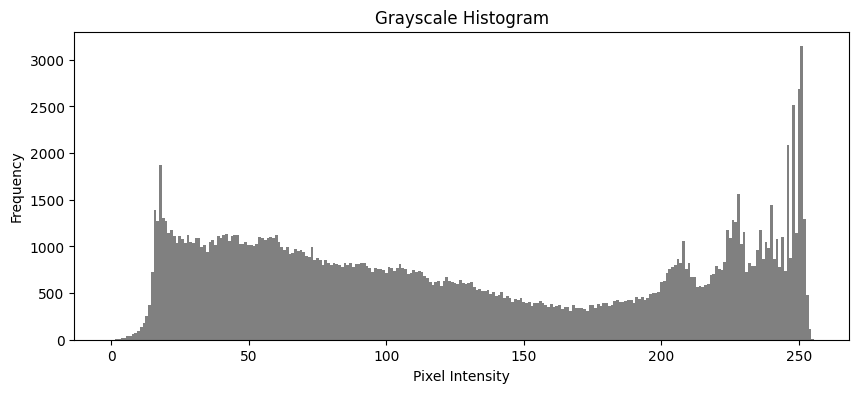

In [12]:
# A1.Grayscale Histogram
def gray_histogram(gray_img):
    counts = np.zeros(256, dtype=int)

    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            intensity = gray_img[i, j]
            counts[intensity] += 1

    return counts

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hist_counts = gray_histogram(gray_img)

# Plotting
plt.figure(figsize=(10, 4))
plt.bar(range(256), hist_counts, color='gray', width=1)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



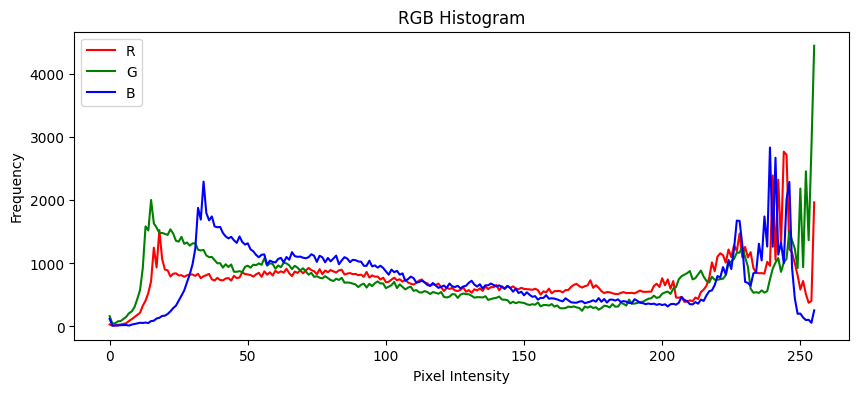

In [13]:
# A.2 RGB Histogram

def rgb_histogram_plot(rgb_img):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        channel_data = rgb_img[:, :, i].flatten()
        counts, bins = np.histogram(channel_data, bins=range(257))
        plt.plot(bins[:-1], counts, color=color, label=f'{color.upper()}')

    plt.title("RGB Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
rgb_histogram_plot(img)

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

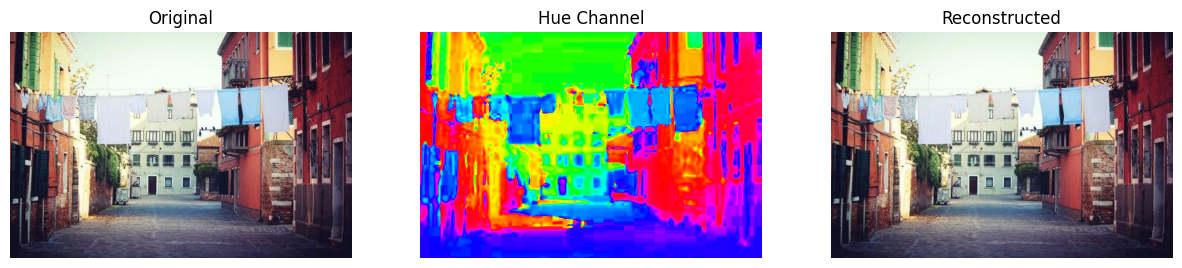

In [14]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
def rgb_to_hsv(rgb_img):
    img = rgb_img.astype(np.float32)

    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    # Get Max, Min, and Difference (Delta)
    c_max = np.max(img, axis=2)
    c_min = np.min(img, axis=2)
    diff = c_max - c_min

    # Calculate Hue
    h = np.zeros_like(c_max)

    # We only calculate hue where there is a difference
    mask = diff > 0

    # If Red is max
    idx = (c_max == r) & mask
    h[idx] = (60 * ((g[idx] - b[idx]) / diff[idx])) % 360

    # If Green is max
    idx = (c_max == g) & mask
    h[idx] = (60 * ((b[idx] - r[idx]) / diff[idx]) + 120) % 360

    # If Blue is max
    idx = (c_max == b) & mask
    h[idx] = (60 * ((r[idx] - g[idx]) / diff[idx]) + 240) % 360

    s = np.zeros_like(c_max)
    not_zero = c_max > 0
    s[not_zero] = (diff[not_zero] / c_max[not_zero]) * 255

    v = c_max

    # Scale Hue to OpenCV range (0-179)
    h_cv = h / 2

    hsv_final = np.dstack((h_cv, s, v))

    return hsv_final.astype(np.uint8)

hsv_result = rgb_to_hsv(img)

plt.figure(figsize=(15, 5))

# Plot Original
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# Plot Hue
plt.subplot(1, 3, 2)
plt.imshow(hsv_result[:,:,0], cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')

# Plot Reconstructed
img_back = cv2.cvtColor(hsv_result, cv2.COLOR_HSV2RGB)
plt.subplot(1, 3, 3)
plt.imshow(img_back)
plt.title("Reconstructed")
plt.axis('off')

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

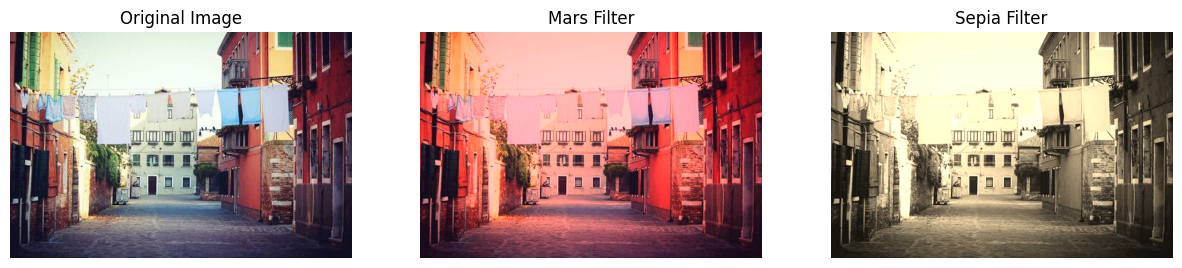

In [15]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
def apply_mars_filter(image):
    img = image.copy().astype(float)

    # Mars is red and dusty.

    img[:,:,0] = img[:,:,0] * 1.5  # Increase Red
    img[:,:,1] = img[:,:,1] * 0.8  # Decrease Green
    img[:,:,2] = img[:,:,2] * 0.8  # Decrease Blue

    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)

def apply_sepia_filter(image):
    # Sepia gives that old-school yellowish/brown look
    img = image.copy().astype(float)
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    new_r = (r * 0.39) + (g * 0.76) + (b * 0.18)
    new_g = (r * 0.34) + (g * 0.68) + (b * 0.16)
    new_b = (r * 0.27) + (g * 0.53) + (b * 0.13)


    img[:,:,0] = new_r
    img[:,:,1] = new_g
    img[:,:,2] = new_b

    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)

mars_img = apply_mars_filter(img)
sepia_img = apply_sepia_filter(img)

plt.figure(figsize=(15, 5))

# 1. Original
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

# 2. Mars Filter
plt.subplot(1, 3, 2)
plt.imshow(mars_img)
plt.title("Mars Filter")
plt.axis('off')

# 3. Sepia Filter
plt.subplot(1, 3, 3)
plt.imshow(sepia_img)
plt.title("Sepia Filter")
plt.axis('off')

plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

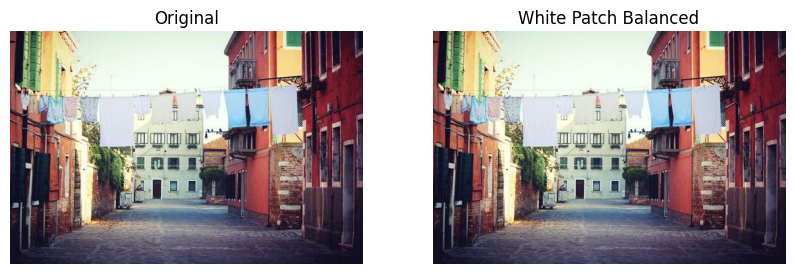

In [16]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
def white_patch_balance(img_rgb):
    img = img_rgb.astype(np.float32)

    # Find max value per channel
    max_r = np.max(img[:, :, 0])
    max_g = np.max(img[:, :, 1])
    max_b = np.max(img[:, :, 2])

    if max_r == 0: max_r = 1
    if max_g == 0: max_g = 1
    if max_b == 0: max_b = 1

    # Apply scaling
    img[:, :, 0] *= 255.0 / max_r
    img[:, :, 1] *= 255.0 / max_g
    img[:, :, 2] *= 255.0 / max_b

    return np.clip(img, 0, 255).astype(np.uint8)

balanced = white_patch_balance(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced)
plt.title("White Patch Balanced")
plt.axis('off')
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )